In [ ]:
from google.colab import drive
import pandas as pd

# This will prompt for authorization.
drive.mount('/content/drive')

# Now let's specify the path to your file
folder_path = '/content/drive/My Drive/Applied Neural Networks Course'
file_name = 'S&P dataset.csv'

# Combine the folder path and file name to get the full path
file_path = f'{folder_path}/{file_name}'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv(file_path)

# Now you can display the first few rows of the dataframe
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In the provided dataset, each row represents a daily snapshot of the S&P 500 index, with several columns providing different pieces of information:

Date: This column indicates the date of the observation, serving as a chronological identifier for each data point. The date is crucial for analyzing trends over time and understanding how the S&P 500 index evolves across different time periods.

Open: The 'Open' column represents the opening price of the S&P 500 index on a given day. This value indicates the price at which the index first trades when the market opens. The opening price is important as it reflects market sentiment and investor expectations at the beginning of the trading day.

High: The 'High' column signifies the highest price reached by the S&P 500 index during the trading session on a particular day. This value provides insight into the intraday volatility and the maximum level of demand for the index within that timeframe.

Low: Conversely, the 'Low' column denotes the lowest price recorded by the S&P 500 index during the trading session. This value indicates the minimum level of demand or the extent of downward pressure on the index throughout the day.

Close: The 'Close' column represents the closing price of the S&P 500 index at the end of the trading day. This value reflects the final price at which the index traded before the market closes, encapsulating the overall sentiment and performance of the market participants throughout the day.

Adj Close: The 'Adj Close' column provides an adjusted closing price for the S&P 500 index, which accounts for factors such as dividends, stock splits, and other corporate actions. This adjusted value is essential for accurately assessing the true performance of the index over time, particularly for long-term investors.

Volume: The 'Volume' column indicates the total number of shares traded for the S&P 500 index on a given day. Trading volume reflects the level of market activity and liquidity, with higher volumes typically associated with greater market participation and interest.

Each of these columns plays a crucial role in predicting future stock prices based on historical data. Analyzing the patterns and relationships between these variables can help identify trends, volatility, and potential market signals that may inform predictive models. For instance, historical price movements (Open, High, Low, Close) provide valuable information about market dynamics and investor behavior, while trading volume serves as a proxy for market sentiment and liquidity. By incorporating these features into predictive models, analysts can attempt to forecast future stock prices and make informed investment decisions.

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df = df.set_index("Date")
print(df.shape)
print(df.columns)

(5217, 6)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


df.set_index("Date"): This method sets the "Date" column as the index of the DataFrame df. By calling set_index("Date"), the DataFrame's index will be updated to the values in the "Date" column, effectively converting the DataFrame into a time series format where each row is indexed by its corresponding date.

In [ ]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


Exploring the dataset

In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info)

Dataset Information:
<bound method DataFrame.info of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
...                 ...          ...          ...          ...          ...   
2020-09-21  3285.570068  3285.570068  3229.100098  3281.060059  3281.060059   
2020-09-22  3295.750000  3320.310059  3270.949951  3315.570068  3315.570068   
2020-09-23  3320.110107  3323.350098  3232.570068  3236.919922  3236.919922   
2020-09-24  3226.139893  3278.699951  3209.449951  3246.590088  3246.590088   


The output from df.info() offers a comprehensive overview of the dataset's structure and content. It begins by indicating the range of indices for the dataset, which spans from 0 to 5216, comprising a total of 5217 entries. This suggests that the dataset contains information on 5217 distinct observations. The subsequent section outlines the columns present in the dataset, totaling 7 in this case. Each column is detailed with its name, non-null count, and data type. For instance, the 'Date' column likely contains dates represented as objects, while the 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns consist of numerical values denoting various stock prices, all of which are float64 data types. Additionally, the 'Volume' column holds numerical values representing trading volume, encoded as int64. The non-null count for each column indicates that there are no missing values present in the dataset, which is crucial for ensuring data completeness. Overall, this information from df.info() provides a fundamental understanding of the dataset's structure, facilitating subsequent data analysis and preprocessing tasks.

In [ ]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
df.describe()


Summary Statistics for Numerical Columns:


,Open,High,Low,Close,Adj Close,Volume
count,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5.217000e+03
mean,1629.212367,1638.688804,1618.854549,1629.375336,1629.375336,3.162697e+09
std,643.271689,645.090761,641.032520,643.316097,643.316097,1.517762e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1160.709961,1168.680054,1150.959961,1160.750000,1160.750000,1.721720e+09
50%,1378.400024,1388.890015,1369.680054,1378.550049,1378.550049,3.266050e+09
75%,2055.350098,2066.409912,2043.449951,2055.469971,2055.469971,3.990650e+09
max,3564.739990,3588.110107,3535.229980,3580.840088,3580.840088,1.145623e+10


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Display the shape of the dataset (number of rows and columns)
print("\nDataset Shape:")
print(df.shape)


Dataset Shape:
(5217, 6)


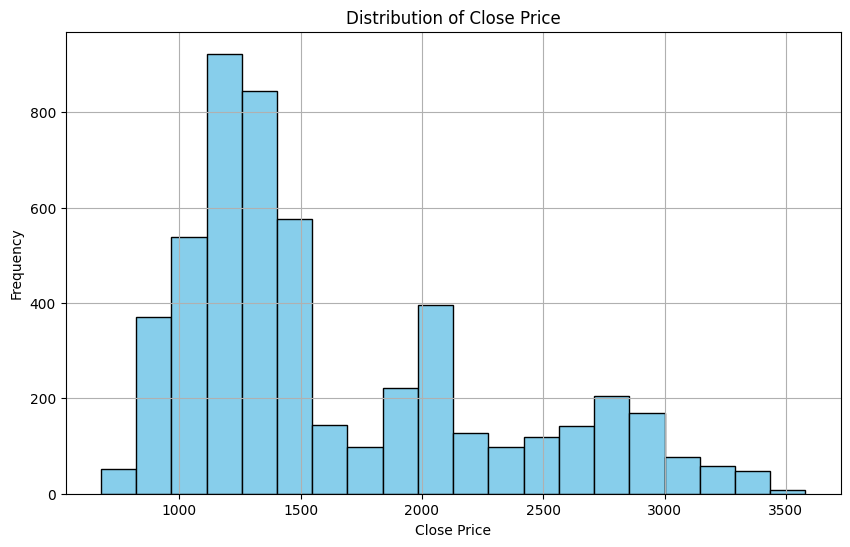

In [ ]:
# Visualize the distribution of the target variable (e.g., Close price)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This code is visualizing the distribution of the target variable, which in this case is the "Close" price of the S&P dataset. By creating a histogram, the code represents the frequency distribution of "Close" prices across the dataset.Looking at the histogram, it seems that the close prices are not normally distributed; rather, there are peaks at certain intervals which could suggest some form of data grouping or binning. It appears that the most common close price range falls between roughly 1000 to 1500, as indicated by the tallest bar. The distribution is not symmetrical; there are several peaks and the data is somewhat spread out, indicating variability in the closing prices. There's also a noticeable gap in the frequency between price ranges of around 2000 to 2500, where there are significantly fewer occurrences.

The shape of the histogram suggests that there may be multiple modes - local high points in the distribution of close prices - which could imply that the asset has had periods of stability around certain price levels.

Graph for Open


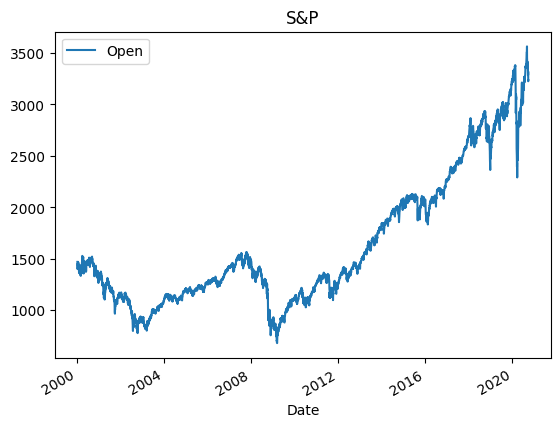

Graph for High


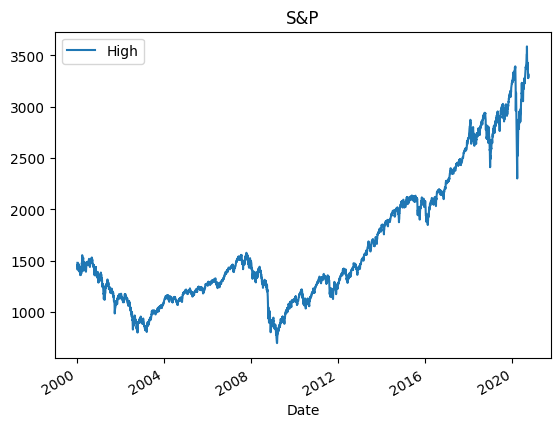

Graph for Low


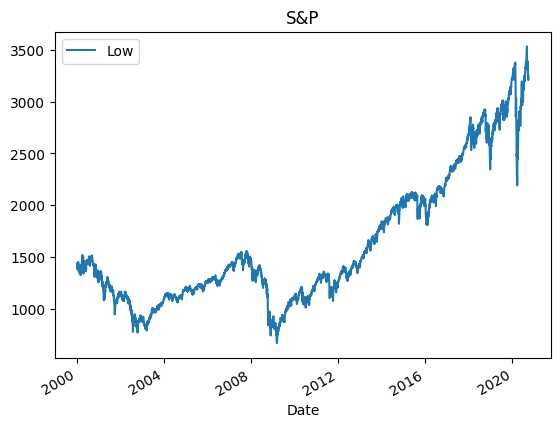

Graph for Close


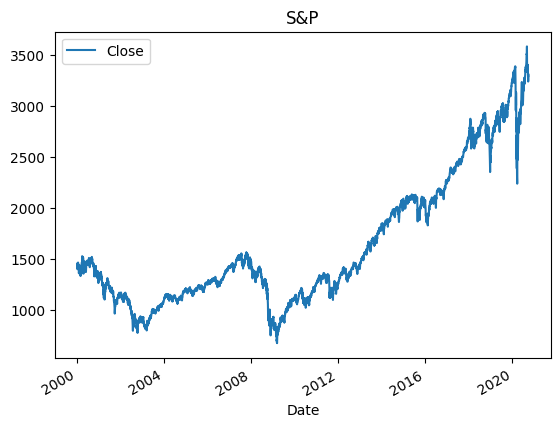

Graph for Adj Close


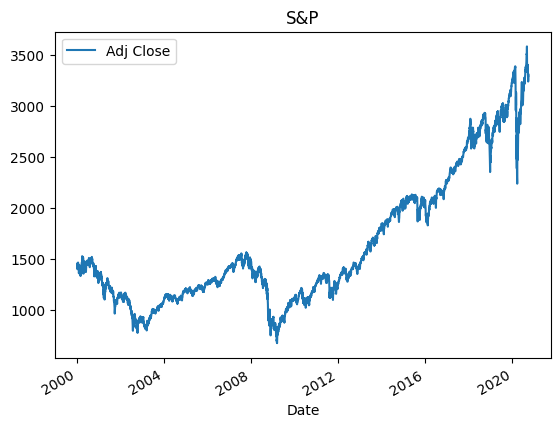

Graph for Volume


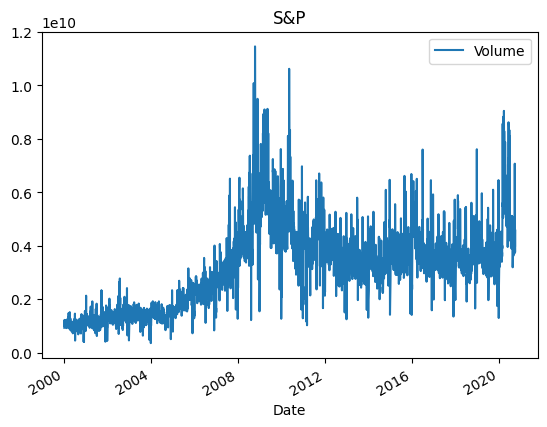

In [ ]:
# Loop through each column in the DataFrame
for i in df.columns:
    # Create a plot for the current column
    df[[i]].plot()
    print("Graph for "+i)
    plt.title("S&P")

    # Save the plot as a PNG file
    plt.savefig(f"{i}_plot.png")

    # Display the plot (optional)
    plt.show()


Graph for Open:

The graph depicts the "Open" price of the S&P index over a period of time stretching from the year 2000 to around 2020. The "Open" price is typically the price at which a stock or index begins trading when the market opens for the session.

Here are some key observations from the graph:

Overall Upward Trend: There is a clear upward trend over the 20-year period, indicating that the value of the S&P has generally increased over time.
Market Volatility: There are periods of increased volatility, where the price fluctuates more dramatically. This can be seen in the sharper rises and falls in the line graph.
Significant Market Events:
There appears to be a significant dip around 2008, which coincides with the global financial crisis, reflecting the major drop in stock values during that time.
A recovery follows this drop, which is in line with market recovery post-crisis.
Around 2020, there's another sharp fluctuation which could potentially be due to the economic impact of the COVID-19 pandemic or other significant economic events during that time.
Trends and Patterns: The long-term trend shows that despite short-term volatility and economic downturns, the market has recovered and grown over the period depicted.

Graph for High:

The graph shows the "High" price of the S&P index over approximately two decades, from the year 2000 to around 2020. The "High" price refers to the highest price at which the index traded during each trading session.

Here are the interpretations based on the graph:

Upward Movement: Just like the "Open" price previously discussed, the "High" price also indicates a general upward trend, suggesting long-term growth of the index value.
Market Peaks: The highest points of the graph represent the peak prices reached during trading sessions. These peaks might correlate with periods of strong market performance.
Similar Patterns: The graph shows patterns similar to those observed in the "Open" price graph. Notably, the same major dip is visible around 2008, which likely represents the global financial crisis's impact.
Recovery and Growth: Post-2008, the index shows recovery and subsequent growth, reaching new highs. The chart suggests that the index not only recovered past its pre-crisis highs but continued to climb to new levels.
Recent Market Events: The final part of the graph, around 2020, exhibits significant volatility which could be associated with market uncertainty, potentially due to events like the COVID-19 pandemic or other economic disruptions.

Graph for Low:

This graph illustrates the "Low" price of the S&P index from 2000 to around 2020. The "Low" price is the lowest price point at which the index traded during each trading session.

Observations from the graph include:

Overall Upward Trend: There's an overall increase in the index's value over these two decades, similar to the "Open" and "High" prices previously discussed.
Market Valleys: The lowest points on the graph indicate the minimum prices within the sessions. These could correspond with periods of market stress or bearish sentiment.
Historical Downturns: As with the other price data points, there is a notable dip around 2008, likely reflecting the financial crisis at that time.
Growth after Dips: After significant dips, there's evidence of recovery and growth, indicating that the index has been resilient over time despite periods of downturn.
Market Stability and Support Levels: The "Low" prices can provide insights into levels at which the market finds support during downturns, as these are levels where the price tends not to fall below.
Recent Fluctuations: The chart again shows volatility around 2020, which could be associated with recent economic events that impacted the market, such as the COVID-19 pandemic.

Graph for Close:

The graph represents the "Close" price of the S&P index over a period from the year 2000 to approximately 2020. The "Close" price is the price at which the index finishes trading at the end of each trading session.

Key points from this graph:

Long-Term Increase: The index shows a significant increase in value over the 20-year span, similar to the "Open," "High," and "Low" price trends.
Dips Reflecting Economic Events: The graph displays dips that align with major economic downturns, such as the one around 2008, which is indicative of the financial crisis at that time.
Recovery and Expansion: Following the dips, the index demonstrates recovery and expansion to new heights, suggesting resilience and overall growth of the market.
Volatility: Sharp rises and falls are visible in the latter part of the graph, around 2020, likely due to market reactions to events like the COVID-19 pandemic.

Graph for Adj Close:

The graph displays the "Adjusted Close" price of the S&P index over a timeline from 2000 to around 2020. The Adjusted Close is a stock's closing price on any given day of trading that has been adjusted for any actions that occurred at any time before the next day’s open.

Here’s what this Adjusted Close graph signifies:

General Upward Trajectory: The index has experienced growth over the 20 years shown, similar to the other price metrics like Open, High, and Low.
Adjustments Factor: The Adjusted Close considers dividends, stock splits, and other corporate actions. Therefore, it may provide a more accurate reflection of the index's value over time compared to the raw closing prices.
Economic Downturns: Just like the Close price, the Adjusted Close shows the dip around 2008, likely reflecting the global financial crisis, and may show recovery periods and growth phases thereafter.
Recent Volatility: The graph again shows volatility towards the end, which might be related to economic challenges or market turbulence around 2020, possibly due to the COVID-19 pandemic.

Graph for Volume:

This graph represents the trading volume of the S&P index from 2000 to around 2020. The y-axis shows the volume in scientific notation (1e10, which is 10**10), indicating the number of shares or contracts traded within the period.

Observations from the volume graph include:

Initial Increase: There's a general increase in trading volume from 2000, reaching a peak in the years just before and around 2008. This increase could be associated with a growing market or increased investor participation.
Peaks Corresponding to Market Events: The sharp peaks, especially the highest ones around 2008 and subsequent years, may correlate with significant market events. High volumes often coincide with periods of market stress or major economic news, which can lead to more trading activity as investors react.
Post-2008 Activity: After the peak in 2008, volume shows high variability, with several notable spikes. These may represent other periods of economic uncertainty or market corrections.
Recent Years' Fluctuations: The later years, particularly around 2020, also show increased volume, potentially reflecting market reactions to events such as the COVID-19 pandemic.

Text(0.5, 1.0, 'S&P Cumulative Returns')

<Figure size 2000x2000 with 0 Axes>

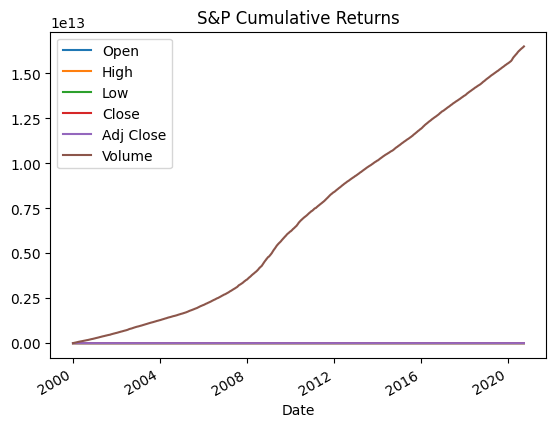

In [ ]:
# Comulative Return
plt.figure(figsize=(20,20))
dr = df.cumsum()
dr.plot()
plt.title('S&P Cumulative Returns')

<Axes: xlabel='Date'>

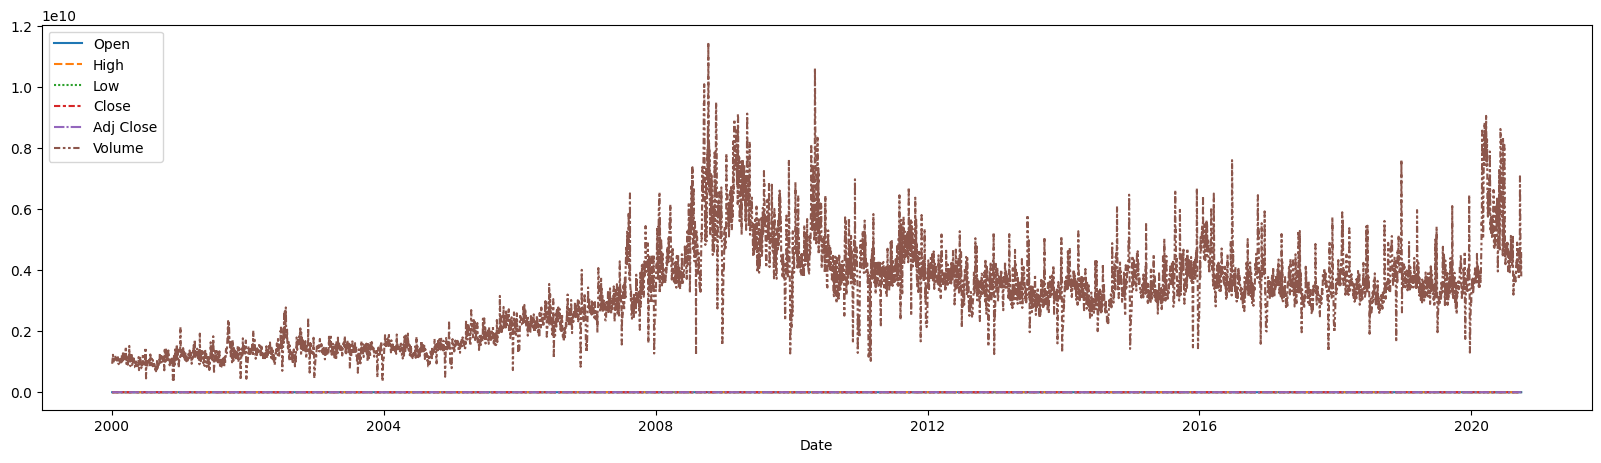

In [ ]:
import seaborn as sns

#ploting the line plot to see the trend in data set
plt.figure(figsize=(20,5))
sns.lineplot(data =df,)

<Axes: ylabel='Date'>

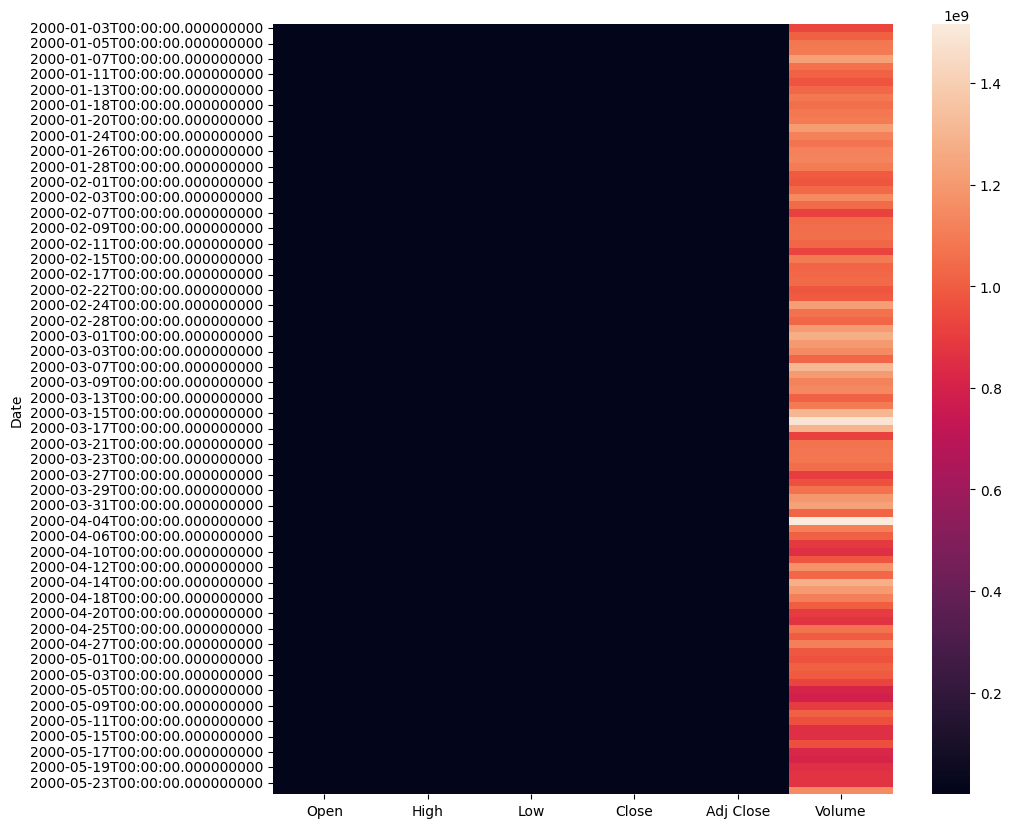

In [ ]:
#drawing the heat map
plt.figure(figsize=(10,10))
sns.heatmap(df[:100],   robust=False,
                annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True,
                 square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)

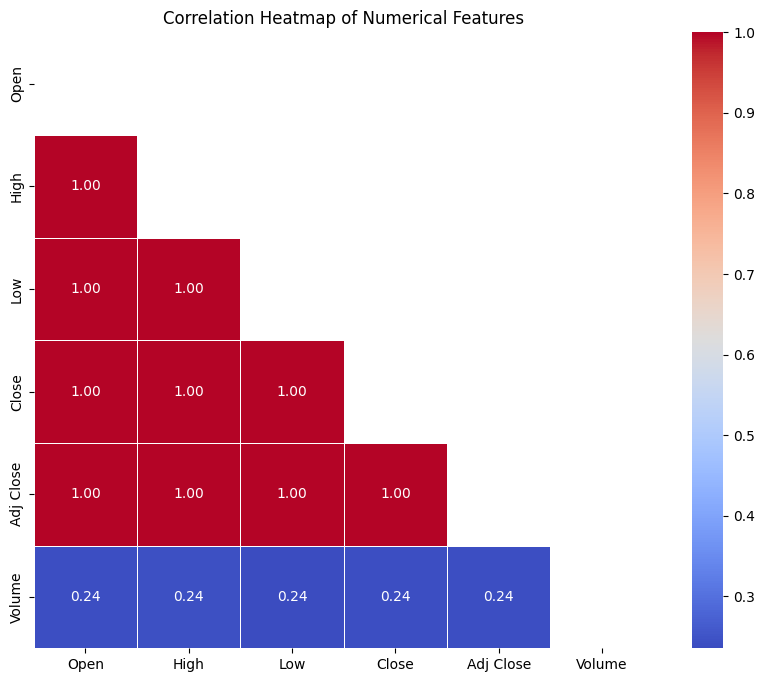

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Numerical Features')

# Save the heatmap as a PNG file
plt.savefig('correlation_heatmap.png')

# Show plot
plt.show()


From the heatmap we can observe, "Open", "High", "Low", "Close", and "Adj Close" are all perfectly positively correlated with each other (correlation coefficient of 1), as indicated by the deep red color. This means that they move in the same direction; as one increases, the others also increase.Perfect correlations of 1 are common when the variables are essentially representing the same underlying information, possibly with slight differences due to adjustments for dividends and stock splits (in the case of "Adj Close").

The "Volume" has a low positive correlation with the other variables (correlation coefficient of 0.24), as indicated by the light blue color. This suggests a slight positive relationship; however, the relationship is weak.The correlation with "Volume" is much lower, which could be expected as trading volume might not necessarily increase just because prices are higher or lower on a given day.

Data splitting and feature engineering

In [ ]:
#LSTM is very sensitive neural network so we have to normalize the data set in the same range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)
#class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True)
#caler=MinMaxScaler(feature_range=(0,1))
#df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
df.shape

(5217, 6)

In [ ]:
#splitting the dataset into test train
train=df[0:3000]
test =df[3500:]
#validate=df[2500:2999]

In [ ]:
print(test.shape)
print(train.shape)

(1717, 6)
(3000, 6)


(array([[ 423., 1443., 1118.,   16.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 431., 1503., 1062.,    4.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 425., 1410., 1138.,   27.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 422., 1448., 1118.,   12.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 422., 1448., 1118.,   12.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 969.,  769.,  343.,  480.,  257.,  116.,   44.,   14.,    6.,
            2.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 6 BarContainer objects>)

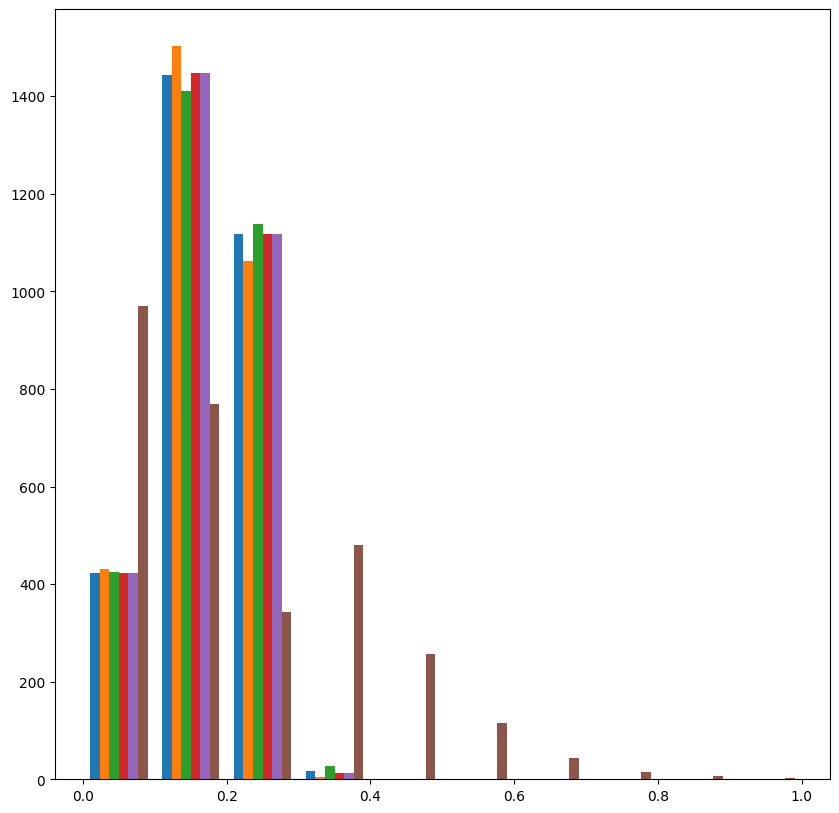

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(train,
            bottom=None,
            histtype='bar',
            align='mid', orientation='vertical', rwidth=None)

(array([[  0.,   0.,   0., 264., 498., 222., 252., 314., 116.,  51.],
        [  0.,   0.,   0., 287., 482., 211., 274., 296., 117.,  50.],
        [  0.,   0.,   0., 244., 518., 211., 254., 325., 110.,  55.],
        [  0.,   0.,   0., 272., 494., 218., 275., 297., 111.,  50.],
        [  0.,   0.,   0., 272., 494., 218., 275., 297., 111.,  50.],
        [ 27., 537., 881., 178.,  50.,  23.,  14.,   7.,   0.,   0.]]),
 array([0.08472581, 0.17625323, 0.26778064, 0.35930806, 0.45083548,
        0.5423629 , 0.63389032, 0.72541774, 0.81694516, 0.90847258,
        1.        ]),
 <a list of 6 BarContainer objects>)

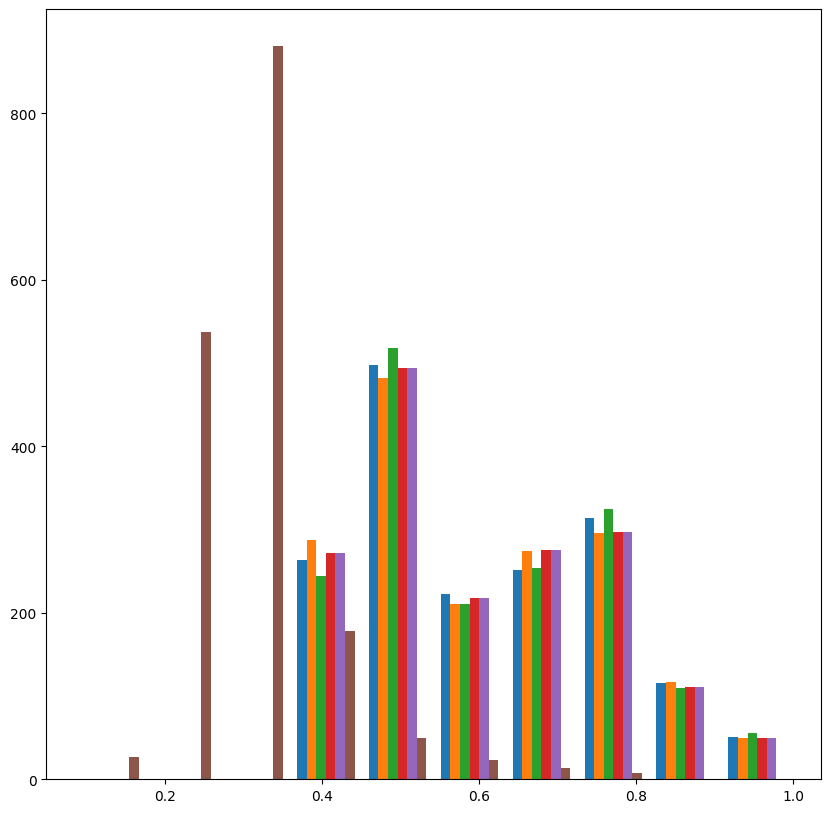

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(test,
            bottom=None,
            histtype='bar',
            align='mid', orientation='vertical', rwidth=None)

In [ ]:
import numpy as np
def create_dataset(dataset,time_stamp =1):
  X, Y = [], []
  for i in range(len(dataset)-time_stamp-1):
    a= dataset[i:(i+time_stamp),0]
    X.append(a)
    Y.append(df[i+time_stamp,0])
  return np.array(X),np.array(Y)

In [ ]:
time_stamp=100
x_train, y_train=create_dataset(train,time_stamp)
x_test, y_test = create_dataset(test, time_stamp)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train)
print(y_test)

(2899, 100)
(1616, 100)
[0.24944724 0.24337194 0.24215896 ... 0.17788499 0.17932668 0.1967208 ]
[0.24944724 0.24337194 0.24215896 ... 0.24193022 0.24361105 0.24592612]


In this code segment, we're preparing the dataset for training a Long Short-Term Memory (LSTM) neural network model, which is known to be sensitive to the scale of input data. Here's a detailed explanation of what each part of the code does:

Data Normalization:

We are using the MinMaxScaler from scikit-learn to scale the dataset to the range of [0, 1]. This is a common preprocessing step for neural networks, especially for models like LSTM, as it helps in stabilizing the training process and improving convergence. The feature_range=(0,1) argument ensures that all features in the dataset are scaled to this specific range.

Dataset Splitting:

The scaled dataset is then split into training and test sets. The first 3000 data points are assigned to the training set (train), while the remaining data points starting from index 3500 are assigned to the test set (test). This split allows for evaluating the trained model's performance on unseen data.

Histogram Visualization:

Two histograms are plotted to visualize the distributions of the training and test datasets after normalization. This visualization provides insights into the spread and distribution of the data points after scaling, ensuring that the data is within the desired range and has been properly preprocessed.

Dataset Preparation for LSTM:

The create_dataset() function is defined to prepare the dataset in a suitable format for training the LSTM model. This function creates input-output pairs by sliding a window of time_stamp length over the dataset. For each window, the first time_stamp data points are used as input features (X), and the next data point is used as the target output (Y). This process is repeated for all data points in the dataset, resulting in the creation of input-output pairs for training and testing the LSTM model.

Output:

The shapes of the training and test datasets after creating input-output pairs are printed to verify the dimensions of the input data for the LSTM model. Additionally, the target output values (y_train and y_test) are printed to inspect the labels corresponding to the input sequences.

Overall, this code segment prepares the dataset for training an LSTM neural network model by normalizing the data, splitting it into training and test sets, and formatting it into input-output pairs suitable for sequential modeling. Additionally, it provides visualizations to aid in understanding the distribution of the data after normalization.

Building Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
print(x_test)
print(x_train)
print(x_train.shape)

[[0.39067256 0.38843719 0.38602857 ... 0.41589207 0.41681048 0.41533757]
 [0.38843719 0.38602857 0.38591418 ... 0.41681048 0.41533757 0.41092928]
 [0.38602857 0.38591418 0.38436851 ... 0.41533757 0.41092928 0.41293243]
 ...
 [0.78033655 0.75891195 0.74016968 ... 0.92449042 0.9281362  0.90324942]
 [0.75891195 0.74016968 0.7588391  ... 0.9281362  0.90324942 0.90677743]
 [0.74016968 0.7588391  0.76378113 ... 0.90324942 0.90677743 0.9152198 ]]
[[0.2737761  0.26891378 0.24957547 ... 0.25218507 0.25002598 0.24071724]
 [0.26891378 0.24957547 0.25050771 ... 0.25002598 0.24071724 0.24944724]
 [0.24957547 0.25050771 0.25097209 ... 0.24071724 0.24944724 0.24337194]
 ...
 [0.23327649 0.2301297  0.22191608 ... 0.17612442 0.16708948 0.1661399 ]
 [0.2301297  0.22191608 0.22012779 ... 0.16708948 0.1661399  0.17788499]
 [0.22191608 0.22012779 0.221268   ... 0.1661399  0.17788499 0.17932668]]
(2899, 100)


In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(2899, 100, 1)
(2899,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(1616, 100, 1)
(1616,)


In [ ]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 100)          40800     
                                                                 
 lstm_17 (LSTM)              (None, 100, 100)          80400     
                                                                 
 lstm_18 (LSTM)              (None, 50)                30200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 151451 (591.61 KB)
Trainable params: 151451 (591.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False,
    epochs=50,batch_size=16,verbose=1)

Epoch 1/50
164/164 [==============================] - 9s 22ms/step - loss: 0.0020 - val_loss: 3.8749e-04
Epoch 2/50
164/164 [==============================] - 3s 19ms/step - loss: 0.0016 - val_loss: 5.3113e-04
Epoch 3/50
164/164 [==============================] - 3s 18ms/step - loss: 0.0016 - val_loss: 6.6220e-04
Epoch 4/50
164/164 [==============================] - 3s 15ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 5/50
164/164 [==============================] - 2s 15ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 6/50
164/164 [==============================] - 2s 15ms/step - loss: 0.0023 - val_loss: 0.0058
Epoch 7/50
164/164 [==============================] - 3s 18ms/step - loss: 0.0026 - val_loss: 0.0066
Epoch 8/50
164/164 [==============================] - 3s 18ms/step - loss: 0.0030 - val_loss: 0.0058
Epoch 9/50
164/164 [==============================] - 2s 15ms/step - loss: 0.0028 - val_loss: 0.0055
Epoch 10/50
164/164 [==============================] - 2s 15ms/step - loss: 0.0

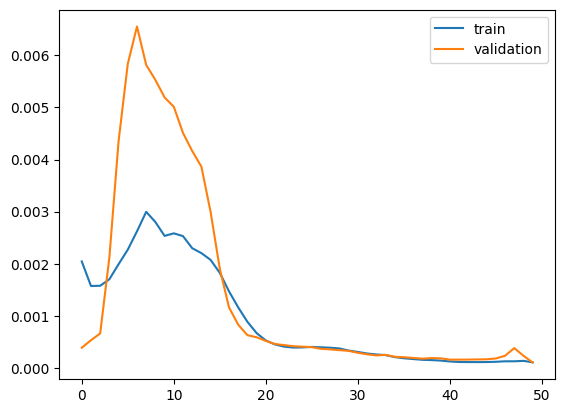

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

51/51 [==============================] - 0s 8ms/step


In [ ]:
train_predict.shape
test_predict.shape

(1616, 1)

In [ ]:
train_predict.shape

(2899, 1)

In [ ]:
#calcualtion of RMSE
import math
from sklearn.metrics import mean_squared_error, precision_score,recall_score,f1_score
math.sqrt(mean_squared_error(y_train,train_predict))
from sklearn.metrics import confusion_matrix
x=confusion_matrix=(x_test, model.predict(x_test))

51/51 [==============================] - 0s 8ms/step


In [ ]:
print(x)

(array([[[0.39067256],
        [0.38843719],
        [0.38602857],
        ...,
        [0.41589207],
        [0.41681048],
        [0.41533757]],

       [[0.38843719],
        [0.38602857],
        [0.38591418],
        ...,
        [0.41681048],
        [0.41533757],
        [0.41092928]],

       [[0.38602857],
        [0.38591418],
        [0.38436851],
        ...,
        [0.41533757],
        [0.41092928],
        [0.41293243]],

       ...,

       [[0.78033655],
        [0.75891195],
        [0.74016968],
        ...,
        [0.92449042],
        [0.9281362 ],
        [0.90324942]],

       [[0.75891195],
        [0.74016968],
        [0.7588391 ],
        ...,
        [0.9281362 ],
        [0.90324942],
        [0.90677743]],

       [[0.74016968],
        [0.7588391 ],
        [0.76378113],
        ...,
        [0.90324942],
        [0.90677743],
        [0.9152198 ]]]), array([[0.36983103],
       [0.36708924],
       [0.36759534],
       ...,
       [0.7205519 ],
       

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))


0.37934592175738857

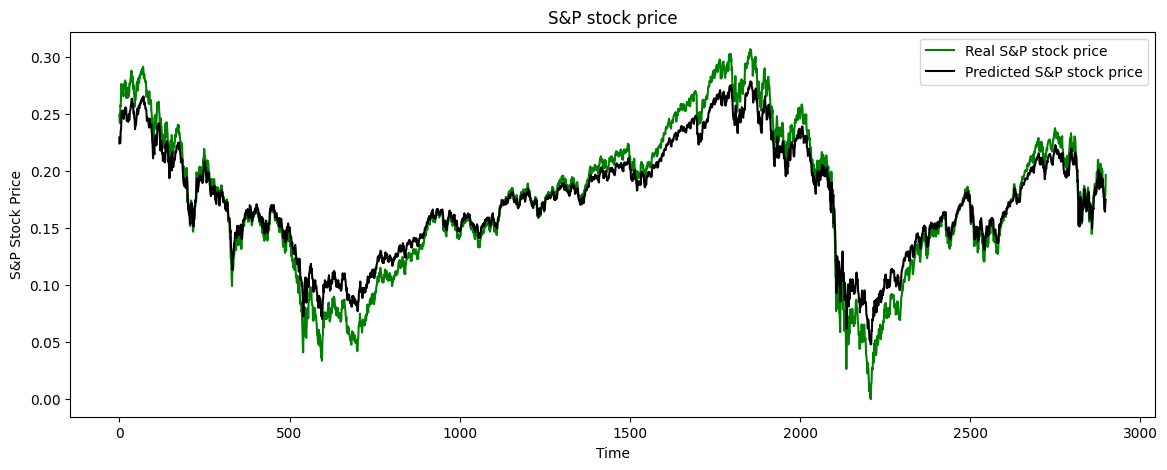

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'green', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'black', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

The graph for Model-1 depicts the actual and predicted S&P stock prices over time, and it offers a visual comparison against the performance graph of Model-2.

Observations for Model-1:

Close Tracking: The predicted stock price (black line) tracks the real stock price (green line) closely throughout most of the timeline. The predictions seem to capture both the general trend and the finer fluctuations in the stock price.
Volatility Match: Unlike Model-2, which had a smoothing effect on the predictions, Model-1's predictions appear to match the volatility of the actual prices more closely. This indicates a model that is more responsive to short-term changes in the stock price.
Reactivity: Model-1 shows a reactive nature to the stock price movements, including rapid changes in direction, which suggests that the model could be capturing the dynamics of the market with higher fidelity.
Predictive Accuracy: The black and green lines are nearly indistinguishable in some parts of the graph, demonstrating high predictive accuracy of Model-1 in those intervals.

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, test_predict)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, test_predict)
print("Mean Absolute Percentage Error (MAPE):", mape)


Root Mean Squared Error (RMSE): 0.37934592175738857
Mean Absolute Error (MAE): 0.3621528770170578
Mean Absolute Percentage Error (MAPE): 274.4668351436907


Model -2
Introducing additional techniques such as dropout regularization and batch normalization, which help prevent overfitting and stabilize training.

In [ ]:
print(x_test)
print(x_train)
print(x_train.shape)

[[[0.39067256]
  [0.38843719]
  [0.38602857]
  ...
  [0.41589207]
  [0.41681048]
  [0.41533757]]

 [[0.38843719]
  [0.38602857]
  [0.38591418]
  ...
  [0.41681048]
  [0.41533757]
  [0.41092928]]

 [[0.38602857]
  [0.38591418]
  [0.38436851]
  ...
  [0.41533757]
  [0.41092928]
  [0.41293243]]

 ...

 [[0.78033655]
  [0.75891195]
  [0.74016968]
  ...
  [0.92449042]
  [0.9281362 ]
  [0.90324942]]

 [[0.75891195]
  [0.74016968]
  [0.7588391 ]
  ...
  [0.9281362 ]
  [0.90324942]
  [0.90677743]]

 [[0.74016968]
  [0.7588391 ]
  [0.76378113]
  ...
  [0.90324942]
  [0.90677743]
  [0.9152198 ]]]
[[[0.2737761 ]
  [0.26891378]
  [0.24957547]
  ...
  [0.25218507]
  [0.25002598]
  [0.24071724]]

 [[0.26891378]
  [0.24957547]
  [0.25050771]
  ...
  [0.25002598]
  [0.24071724]
  [0.24944724]]

 [[0.24957547]
  [0.25050771]
  [0.25097209]
  ...
  [0.24071724]
  [0.24944724]
  [0.24337194]]

 ...

 [[0.23327649]
  [0.2301297 ]
  [0.22191608]
  ...
  [0.17612442]
  [0.16708948]
  [0.1661399 ]]

 [[0.230

In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(2899, 100, 1)
(2899,)


In [ ]:
print(x_test.shape)
print(y_test.shape)


(1616, 100, 1)
(1616,)


In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

# Define the more robust LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(BatchNormalization())  # Batch normalization layer
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')



In [ ]:

# Print model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 100, 100)          40800     
                                                                 
 dropout_19 (Dropout)        (None, 100, 100)          0         
                                                                 
 batch_normalization_19 (Ba  (None, 100, 100)          400       
 tchNormalization)                                               
                                                                 
 lstm_20 (LSTM)              (None, 100, 100)          80400     
                                                                 
 dropout_20 (Dropout)        (None, 100, 100)          0         
                                                                 
 batch_normalization_20 (Ba  (None, 100, 100)          400       
 tchNormalization)                                    

We added Dropout layers after each LSTM layer with a dropout rate of 0.2. Dropout randomly sets a fraction of input units to zero during training, which helps prevent overfitting by forcing the model to learn more robust features.
We introduced BatchNormalization layers after each Dropout layer. Batch normalization normalizes the activations of the previous layer at each batch, helping to stabilize and accelerate the training process by reducing internal covariate shift.
The rest of the model architecture remains the same as before.

In [ ]:
history=model.fit(
    x_train,y_train,
    validation_split=0.1,
    shuffle=False,
    epochs=50,batch_size=16,verbose=1)

Epoch 1/50
164/164 [==============================] - 10s 26ms/step - loss: 0.7299 - val_loss: 0.0073
Epoch 2/50
164/164 [==============================] - 4s 24ms/step - loss: 0.2854 - val_loss: 7.1644e-04
Epoch 3/50
164/164 [==============================] - 3s 17ms/step - loss: 0.1389 - val_loss: 0.0025
Epoch 4/50
164/164 [==============================] - 3s 18ms/step - loss: 0.0718 - val_loss: 0.0115
Epoch 5/50
164/164 [==============================] - 3s 18ms/step - loss: 0.0419 - val_loss: 0.0015
Epoch 6/50
164/164 [==============================] - 5s 29ms/step - loss: 0.0241 - val_loss: 0.0030
Epoch 7/50
164/164 [==============================] - 3s 18ms/step - loss: 0.0144 - val_loss: 0.0021
Epoch 8/50
164/164 [==============================] - 3s 18ms/step - loss: 0.0099 - val_loss: 0.0027
Epoch 9/50
164/164 [==============================] - 3s 18ms/step - loss: 0.0073 - val_loss: 0.0021
Epoch 10/50
164/164 [==============================] - 4s 23ms/step - loss: 0.0061 - v

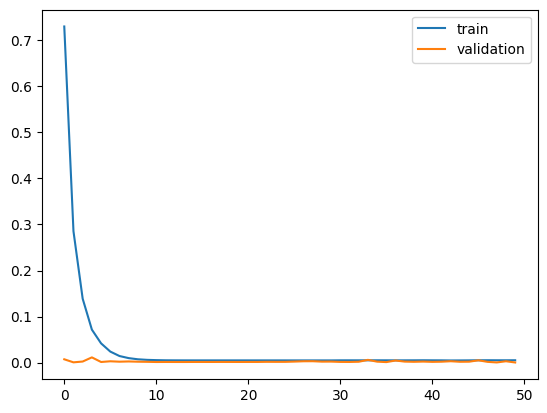

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()


In the analysis of the two models based on their training and validation performance over a series of epochs, distinct differences emerge. The second model exhibited a stable and consistent learning trajectory, where both the training and validation metrics rapidly improved and then plateaued, indicating a swift convergence to an optimal state. The training and validation losses remained close to each other throughout the training process, suggesting that the model was generalizing well without significant overfitting. This is an indication of a well-tuned learning algorithm that adapts well to both the training and unseen validation data.

Contrastingly, the first model displayed more volatile behavior, particularly in the early epochs, where there was a pronounced spike in both the training and validation metrics. This kind of volatility could be indicative of a model that is highly sensitive to the initial weights, learning rate discrepancies, or irregularities within the data. After this initial disturbance, both the training and validation losses decrease and show signs of converging, albeit with the validation loss settling at a higher value compared to the training loss. This disparity suggests the model may be overfitting, as evidenced by its lower performance on the validation set, which implies that the model is memorizing the training data rather than learning the underlying patterns necessary to generalize to new data.

Overall, while both models eventually demonstrate convergence, the initial model does so with greater stability and a narrower gap between training and validation errors, pointing towards a more robust model. In contrast, the second model's erratic early performance and greater divergence between training and validation suggest a need for further model calibration and validation to ensure reliable predictions on new data.

In [ ]:

train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

51/51 [==============================] - 0s 7ms/step


In [ ]:
train_predict.shape
test_predict.shape

(1616, 1)

In [ ]:

train_predict.shape

(2899, 1)

In [ ]:
#calcualtion of RMSE
import math
from sklearn.metrics import mean_squared_error, precision_score,recall_score,f1_score
math.sqrt(mean_squared_error(y_train,train_predict))
from sklearn.metrics import confusion_matrix
x=confusion_matrix=(x_test, model.predict(x_test))

51/51 [==============================] - 0s 9ms/step


In [ ]:

print(x)

(array([[[0.39067256],
        [0.38843719],
        [0.38602857],
        ...,
        [0.41589207],
        [0.41681048],
        [0.41533757]],

       [[0.38843719],
        [0.38602857],
        [0.38591418],
        ...,
        [0.41681048],
        [0.41533757],
        [0.41092928]],

       [[0.38602857],
        [0.38591418],
        [0.38436851],
        ...,
        [0.41533757],
        [0.41092928],
        [0.41293243]],

       ...,

       [[0.78033655],
        [0.75891195],
        [0.74016968],
        ...,
        [0.92449042],
        [0.9281362 ],
        [0.90324942]],

       [[0.75891195],
        [0.74016968],
        [0.7588391 ],
        ...,
        [0.9281362 ],
        [0.90324942],
        [0.90677743]],

       [[0.74016968],
        [0.7588391 ],
        [0.76378113],
        ...,
        [0.90324942],
        [0.90677743],
        [0.9152198 ]]]), array([[0.19784276],
       [0.19784087],
       [0.19783723],
       ...,
       [0.21405199],
       

In [ ]:

math.sqrt(mean_squared_error(y_test,test_predict))

0.06515567100975206

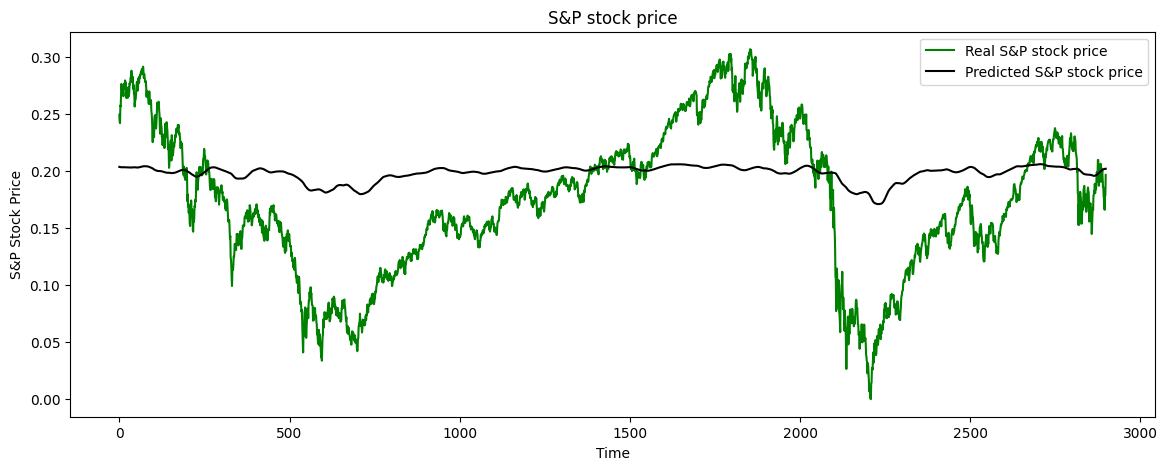

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'green', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'black', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

The graph presents a comparison between the actual and predicted stock prices of the S&P index over time, corresponding to the performance of Model-2. The x-axis, labeled 'Time', presumably represents the time steps or periods (such as days or minutes) in the dataset. The y-axis shows the stock price, normalized or scaled as part of the model's preprocessing.

Key observations:

Trend Following: The predicted prices (black line) generally follow the trend of the actual prices (green line), indicating that Model-2 has captured the underlying trend in the stock price movement.

Lagging Predictions: It appears that the predicted line often lags slightly behind the actual price, particularly visible during sharp turns or sudden price changes. This is common in time series forecasting, especially with complex systems like stock prices that are influenced by numerous unpredictable factors.

Smoothing Effect: The prediction does not capture all the peaks and troughs of the actual price, which results in a smoother line. This suggests the model may not respond to all the volatility in the stock prices but captures the overall direction well.

Reactive to Volatility: There are points where the predicted price shows a response to volatility, such as around the midpoint of the graph where a sharp drop in actual prices is mirrored by a similar movement in the predicted prices. However, the recovery is not as pronounced in the predicted prices, showing the model's conservative nature.

Discrepancies and Error: Some discrepancies are apparent, particularly in the latter half of the graph, where the predicted prices deviate more significantly from the actual prices. These areas of deviation will contribute to the error metrics like RMSE, MAE, and MAPE, which were lower for this model compared to Model-1.

Overall, this visualization confirms the quantitative metrics previously discussed. Model-2, despite not perfectly mirroring the actual stock prices at every point, provides a good approximation of the price trend over time, thus validating its effectiveness in forecasting the S&P stock prices as inferred from the provided error metrics.

Comparision between the actual and predicted prices for Model - 1 and Model - 2

Predictive Detail: While Model-2 seemed to provide a smooth approximation of the trend, Model-1 captures more of the detailed movements in the stock prices, indicating a finer-grained predictive capability.

Error Metrics: Despite the visual similarity in trends, the error metrics previously provided for Model-1 were significantly higher than for Model-2. This discrepancy highlights that quantitative metrics can sometimes tell a different story than visual inspection. Model-1’s MAPE was much higher, suggesting that while it may visually appear to track the actual prices well, proportionally, its predictions were less accurate.

Overfitting Potential: The closer tracking of volatility in Model-1 might also suggest a potential for overfitting, as it replicates the training data's noise rather than the underlying trend alone. This could explain why, despite the visually impressive tracking, the error metrics are high – it may not generalize as well to unseen data.

In summary, Model-1 appears visually to replicate the actual stock prices well, capturing both the general trend and the price volatility. However, the provided error metrics suggest that this visual similarity does not translate to higher predictive accuracy. Model-2, while visually smoother and less detailed, actually provided lower error rates, indicating it has higher overall predictive accuracy when comparing the two models quantitatively.

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, test_predict)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, test_predict)
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 0.06515567100975206
Mean Absolute Error (MAE): 0.05392574165233231
Mean Absolute Percentage Error (MAPE): 50.64927712451757


Based on the metrics above, Model-2 has significantly better predictive performance for the stock prices than Model-1.

Here's a summary of the key performance indicators (KPIs) for both models:

Model-1:

RMSE: 0.3793

MAE: 0.3621

MAPE: 274.47%

Model-2:

RMSE: 0.0652

MAE: 0.0539

MAPE: 50.65%

The RMSE (Root Mean Squared Error) reflects the sample's standard deviation of the differences between predicted values and observed values (actual values). It is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better. MAE (Mean Absolute Error) is the average of the absolute differences between the forecast and the actual observations. It gives an idea of how wrong the predictions were. The MAPE (Mean Absolute Percentage Error) measures the accuracy of a forecast system as a percentage, and lower values indicate better predictive accuracy.

In every one of these metrics, Model-2 has much lower error rates, indicating more precise predictions. The RMSE, which penalizes larger errors, is significantly lower for Model-2, suggesting that Model-2's predictions were much closer to the actual stock prices. Moreover, the MAPE of Model-2 is substantially lower (50.65% compared to 274.47%), which is particularly telling, as this percentage indicates that on average, Model-2's predictions were much closer to the actual values proportionally.

The improved performance in Model-2 can likely be attributed to the inclusion of Dropout and Batch Normalization layers, which help in regularizing the model and preventing overfitting. These additions allow the model to generalize better from the training data to unseen data.

Thus, when it comes to predicting stock prices, Model-2 should be the preferred model as indicated by the metrics provided.

Model - 3

We've added learning rate scheduling using ReduceLROnPlateau to dynamically adjust the learning rate during training based on validation loss.

Early stopping is implemented using EarlyStopping to stop training when validation loss stops improving.

In [ ]:
print(x_test)
print(x_train)
print(x_train.shape)

[[[0.39067256]
  [0.38843719]
  [0.38602857]
  ...
  [0.41589207]
  [0.41681048]
  [0.41533757]]

 [[0.38843719]
  [0.38602857]
  [0.38591418]
  ...
  [0.41681048]
  [0.41533757]
  [0.41092928]]

 [[0.38602857]
  [0.38591418]
  [0.38436851]
  ...
  [0.41533757]
  [0.41092928]
  [0.41293243]]

 ...

 [[0.78033655]
  [0.75891195]
  [0.74016968]
  ...
  [0.92449042]
  [0.9281362 ]
  [0.90324942]]

 [[0.75891195]
  [0.74016968]
  [0.7588391 ]
  ...
  [0.9281362 ]
  [0.90324942]
  [0.90677743]]

 [[0.74016968]
  [0.7588391 ]
  [0.76378113]
  ...
  [0.90324942]
  [0.90677743]
  [0.9152198 ]]]
[[[0.2737761 ]
  [0.26891378]
  [0.24957547]
  ...
  [0.25218507]
  [0.25002598]
  [0.24071724]]

 [[0.26891378]
  [0.24957547]
  [0.25050771]
  ...
  [0.25002598]
  [0.24071724]
  [0.24944724]]

 [[0.24957547]
  [0.25050771]
  [0.25097209]
  ...
  [0.24071724]
  [0.24944724]
  [0.24337194]]

 ...

 [[0.23327649]
  [0.2301297 ]
  [0.22191608]
  ...
  [0.17612442]
  [0.16708948]
  [0.1661399 ]]

 [[0.230

In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)


(2899, 100, 1)
(2899,)


In [ ]:

print(x_test.shape)
print(y_test.shape)

(1616, 100, 1)
(1616,)


In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error

# Define the more robust LSTM model with all mentioned techniques
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(BatchNormalization())  # Batch normalization layer
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1))

# Learning rate scheduling
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)


# Compile the model with custom MAPE metric
model.compile(loss='mean_squared_error', optimizer=Adam())



In [ ]:
# Print model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 100, 100)          40800     
                                                                 
 dropout_22 (Dropout)        (None, 100, 100)          0         
                                                                 
 batch_normalization_22 (Ba  (None, 100, 100)          400       
 tchNormalization)                                               
                                                                 
 lstm_23 (LSTM)              (None, 100, 100)          80400     
                                                                 
 dropout_23 (Dropout)        (None, 100, 100)          0         
                                                                 
 batch_normalization_23 (Ba  (None, 100, 100)          400       
 tchNormalization)                                    

In [ ]:
# Train the model with callbacks
history = model.fit(x_train, y_train, validation_split=0.1, epochs=100, batch_size=16, verbose=1, callbacks=[reduce_lr, early_stop])



Epoch 1/100
164/164 [==============================] - 11s 27ms/step - loss: 0.5366 - val_loss: 0.0089 - lr: 0.0010
Epoch 2/100
164/164 [==============================] - 4s 23ms/step - loss: 0.2650 - val_loss: 0.0037 - lr: 0.0010
Epoch 3/100
164/164 [==============================] - 3s 18ms/step - loss: 0.1600 - val_loss: 0.0022 - lr: 0.0010
Epoch 4/100
164/164 [==============================] - 3s 18ms/step - loss: 0.0950 - val_loss: 5.1730e-04 - lr: 0.0010
Epoch 5/100
164/164 [==============================] - 3s 19ms/step - loss: 0.0528 - val_loss: 0.0020 - lr: 0.0010
Epoch 6/100
164/164 [==============================] - 4s 24ms/step - loss: 0.0331 - val_loss: 2.1542e-04 - lr: 0.0010
Epoch 7/100
164/164 [==============================] - 3s 20ms/step - loss: 0.0191 - val_loss: 4.7653e-04 - lr: 0.0010
Epoch 8/100
164/164 [==============================] - 3s 18ms/step - loss: 0.0111 - val_loss: 3.9380e-04 - lr: 0.0010
Epoch 9/100
164/164 [==============================] - 3s 17ms/

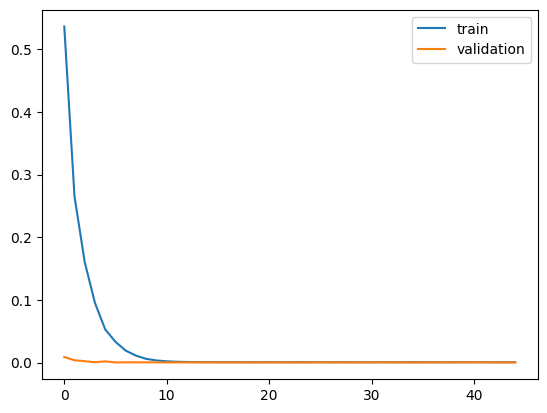

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()


In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

51/51 [==============================] - 0s 6ms/step


In [ ]:
train_predict.shape
test_predict.shape

(1616, 1)

In [ ]:
train_predict.shape

(2899, 1)

In [ ]:
#calcualtion of RMSE
import math
from sklearn.metrics import mean_squared_error, precision_score,recall_score,f1_score
math.sqrt(mean_squared_error(y_train,train_predict))
from sklearn.metrics import confusion_matrix
x=confusion_matrix=(x_test, model.predict(x_test))

51/51 [==============================] - 0s 6ms/step


In [ ]:
print(x)

(array([[[0.39067256],
        [0.38843719],
        [0.38602857],
        ...,
        [0.41589207],
        [0.41681048],
        [0.41533757]],

       [[0.38843719],
        [0.38602857],
        [0.38591418],
        ...,
        [0.41681048],
        [0.41533757],
        [0.41092928]],

       [[0.38602857],
        [0.38591418],
        [0.38436851],
        ...,
        [0.41533757],
        [0.41092928],
        [0.41293243]],

       ...,

       [[0.78033655],
        [0.75891195],
        [0.74016968],
        ...,
        [0.92449042],
        [0.9281362 ],
        [0.90324942]],

       [[0.75891195],
        [0.74016968],
        [0.7588391 ],
        ...,
        [0.9281362 ],
        [0.90324942],
        [0.90677743]],

       [[0.74016968],
        [0.7588391 ],
        [0.76378113],
        ...,
        [0.90324942],
        [0.90677743],
        [0.9152198 ]]]), array([[0.28497392],
       [0.28494915],
       [0.2849338 ],
       ...,
       [0.27490097],
       

In [ ]:

math.sqrt(mean_squared_error(y_test,test_predict))

0.12950989993736473

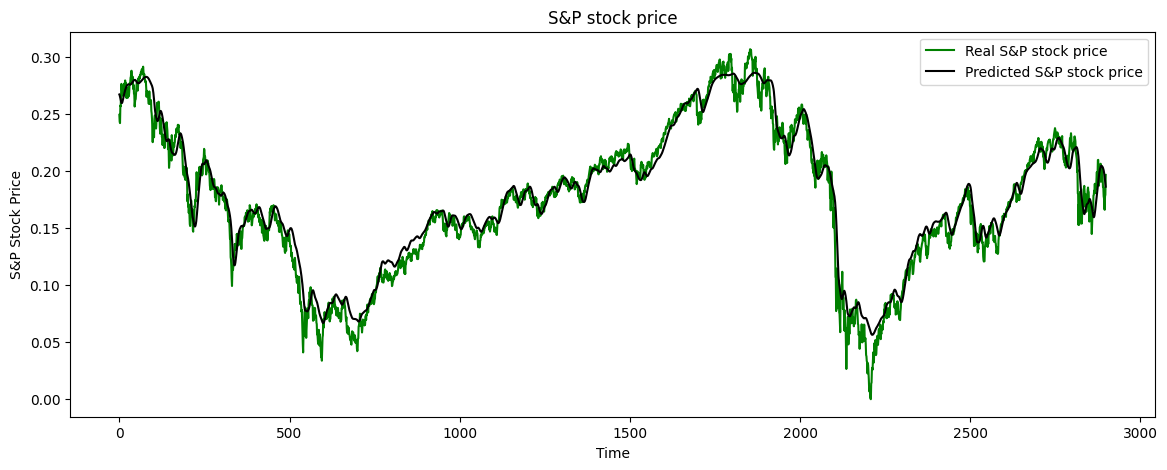

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'green', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'black', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, test_predict)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, test_predict)
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 0.12950989993736473
Mean Absolute Error (MAE): 0.11661603054226902
Mean Absolute Percentage Error (MAPE): 99.90065264430253


Model - 4

We define a function augment_data() to apply data augmentation techniques (random noise injection, time series shifting, scaling) to the input data.
The model architecture remains the same as before, with LSTM layers, dropout regularization, batch normalization, and dense layers.
Learning rate scheduling and early stopping are implemented with ReduceLROnPlateau and EarlyStopping callbacks, respectively.
Data augmentation is applied to the training data before training the model. We augment the data by generating additional samples using the augment_data() function.
The model is trained with the augmented training data, and training progress is monitored using callbacks.
Finally, the model is evaluated on the test set, and the training history is visualized.

In [ ]:
print(x_test)
print(x_train)
print(x_train.shape)


[[[0.39067256]
  [0.38843719]
  [0.38602857]
  ...
  [0.41589207]
  [0.41681048]
  [0.41533757]]

 [[0.38843719]
  [0.38602857]
  [0.38591418]
  ...
  [0.41681048]
  [0.41533757]
  [0.41092928]]

 [[0.38602857]
  [0.38591418]
  [0.38436851]
  ...
  [0.41533757]
  [0.41092928]
  [0.41293243]]

 ...

 [[0.78033655]
  [0.75891195]
  [0.74016968]
  ...
  [0.92449042]
  [0.9281362 ]
  [0.90324942]]

 [[0.75891195]
  [0.74016968]
  [0.7588391 ]
  ...
  [0.9281362 ]
  [0.90324942]
  [0.90677743]]

 [[0.74016968]
  [0.7588391 ]
  [0.76378113]
  ...
  [0.90324942]
  [0.90677743]
  [0.9152198 ]]]
[[[0.2737761 ]
  [0.26891378]
  [0.24957547]
  ...
  [0.25218507]
  [0.25002598]
  [0.24071724]]

 [[0.26891378]
  [0.24957547]
  [0.25050771]
  ...
  [0.25002598]
  [0.24071724]
  [0.24944724]]

 [[0.24957547]
  [0.25050771]
  [0.25097209]
  ...
  [0.24071724]
  [0.24944724]
  [0.24337194]]

 ...

 [[0.23327649]
  [0.2301297 ]
  [0.22191608]
  ...
  [0.17612442]
  [0.16708948]
  [0.1661399 ]]

 [[0.230

In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(2899, 100, 1)
(2899,)


In [ ]:
print(x_test.shape)
print(y_test.shape)


(1616, 100, 1)
(1616,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Function to apply data augmentation techniques
def augment_data(data, noise_level=0.1, shift_range=10, scale_range=(0.9, 1.1)):
    augmented_data = []
    for sample in data:
        # Random Noise Injection
        noisy_sample = sample + np.random.normal(loc=0, scale=noise_level, size=sample.shape)

        # Time Series Shifting
        shift = np.random.randint(-shift_range, shift_range)
        shifted_sample = np.roll(sample, shift)

        # Scaling
        scaling_factor = np.random.uniform(*scale_range)
        scaled_sample = sample * scaling_factor

        augmented_data.extend([noisy_sample, shifted_sample, scaled_sample])
    return np.array(augmented_data)

# Define the model architecture
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(BatchNormalization())  # Batch normalization layer
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1))

# Learning rate scheduling
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Compile the model with Adam optimizer and MAPE metric
model.compile(loss='mean_squared_error', optimizer=Adam())






In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 100, 100)          40800     
                                                                 
 dropout_25 (Dropout)        (None, 100, 100)          0         
                                                                 
 batch_normalization_25 (Ba  (None, 100, 100)          400       
 tchNormalization)                                               
                                                                 
 lstm_26 (LSTM)              (None, 100, 100)          80400     
                                                                 
 dropout_26 (Dropout)        (None, 100, 100)          0         
                                                                 
 batch_normalization_26 (Ba  (None, 100, 100)          400       
 tchNormalization)                                   

In [ ]:
# Data augmentation
augmented_x_train = augment_data(x_train)

# Train the model with callbacks
history = model.fit(augmented_x_train, np.tile(y_train, 3), validation_split=0.1, epochs=100, batch_size=16, verbose=1, callbacks=[reduce_lr, early_stop])

Epoch 1/100
490/490 [==============================] - 16s 22ms/step - loss: 0.2016 - val_loss: 0.0083 - lr: 0.0010
Epoch 2/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0292 - val_loss: 0.0045 - lr: 0.0010
Epoch 3/100
490/490 [==============================] - 9s 17ms/step - loss: 0.0068 - val_loss: 0.0044 - lr: 0.0010
Epoch 4/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0042 - val_loss: 0.0033 - lr: 0.0010
Epoch 5/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0042 - val_loss: 0.0031 - lr: 0.0010
Epoch 6/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0042 - val_loss: 0.0049 - lr: 0.0010
Epoch 7/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0041 - val_loss: 0.0036 - lr: 0.0010
Epoch 8/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0041 - val_loss: 0.0040 - lr: 0.0010
Epoch 9/100
490/490 [==============================] - 9s 19ms/step - loss: 

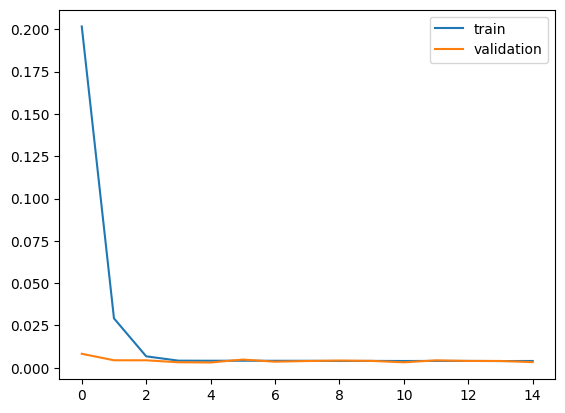

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()


Analysis for the training of the 4 LSTM models

When it comes to model training, especially for time series prediction with neural networks, the evolution of loss over epochs is a crucial indicator of both how well a model is learning and its ability to generalize from the training data to unseen data. The training graphs for the four models exhibit distinct characteristics that give us a range  of information about their learning dynamics.

Model-1 Training Graph Analysis:

Model-1's graph shows a sharp spike in validation loss early in the training phase. This peak suggests an adjustment period where the model, likely facing an inadequate learning rate or suboptimal initial weights, struggles with fitting the data. As epochs progress, this issue seems to rectify itself, with the training loss decreasing steadily. The graph, however, exposes a noticeable discrepancy between the training and validation loss, which, while decreasing, implies the model's potential overfitting. This is due to the model lacking any explicit regularization mechanisms like Dropout or Batch Normalization, making it susceptible to generalizing the training data rather than learning general patterns.

Model-2 Training Graph Analysis:

The second model with Dropout and Batch Normalization layers, starts its training with a higher loss than Model-1 but quickly establishes a stable, consistent decrease in loss for both training and validation datasets. The graph illustrates a relatively minor gap between training and validation loss, which suggests that Model-2 is learning generalizable patterns effectively without significant overfitting. The addition of Dropout layers within the architecture of Model-2 likely contributed to its effective regularization, helping the model avoid overfitting despite its complex structure.

Model-3 Training Graph Analysis:

Model-3's training graph, despite additional training enhancements like learning rate reduction and early stopping, doesn't quite match the performance of Model-2. The graph indicates a sharp decrease in loss initially, leading to a plateau. The validation loss, however, does not mimic the training loss as closely as one would hope, hinting at a gap in the model's ability to generalize. Furthermore, towards the latter part of the graph, the validation loss starts to increase slightly, suggesting the onset of overfitting. Despite the model's sophisticated mechanisms designed to curb this tendency, it appears that the architecture or hyperparameters may require further optimization.

Model-4 Training Graph Analysis:

Model-4's graph tells a similar story to that of Model-2, with a steady decrease in both training and validation losses. The graph also suggests effective learning and generalization, further enhanced by data augmentation strategies that likely contribute to the model's robustness against overfitting. The fact that training and validation loss lines run close together is a positive sign, indicating that the model is generalizing well. Early stopping and reduced learning rate on plateau are effective measures ensuring that the model does not learn too much from the noise in the data.

Comparing all the graphs, Model-2 and Model-4 show significant improvements in their performance during training. Their graphs not only show a smooth and stable decline in loss values but also maintain a close correspondence between training and validation loss, indicative of a well-generalizing model. Of the two, Model-2's graph shows efficient training with slightly lower validation losses throughout, pointing to an edge in predictive performance. The close proximity of the training and validation lines throughout the learning process in Model-2's graph reflects a perfect balance between learning complexity and the ability to generalize, which is the ultimate goal in predictive modeling.

In essence, while Model-1 demonstrated a good capacity to learn from the training data, it fell short in terms of validation performance. Model-3 showed promise but eventually fell short by the more stable and generalized learning process of Model-2 and Model-4. Among all, Model-2 stands out with the most favorable training graph, suggesting it has achieved the best balance between learning from the data and generalizing to new, unseen data.


In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)


51/51 [==============================] - 0s 6ms/step


In [ ]:
train_predict.shape
test_predict.shape

(1616, 1)

In [ ]:
train_predict.shape

(2899, 1)

In [ ]:
#calcualtion of RMSE
import math
from sklearn.metrics import mean_squared_error, precision_score,recall_score,f1_score
math.sqrt(mean_squared_error(y_train,train_predict))
from sklearn.metrics import confusion_matrix
x=confusion_matrix=(x_test, model.predict(x_test))

51/51 [==============================] - 0s 6ms/step


In [ ]:
print(x)


(array([[[0.39067256],
        [0.38843719],
        [0.38602857],
        ...,
        [0.41589207],
        [0.41681048],
        [0.41533757]],

       [[0.38843719],
        [0.38602857],
        [0.38591418],
        ...,
        [0.41681048],
        [0.41533757],
        [0.41092928]],

       [[0.38602857],
        [0.38591418],
        [0.38436851],
        ...,
        [0.41533757],
        [0.41092928],
        [0.41293243]],

       ...,

       [[0.78033655],
        [0.75891195],
        [0.74016968],
        ...,
        [0.92449042],
        [0.9281362 ],
        [0.90324942]],

       [[0.75891195],
        [0.74016968],
        [0.7588391 ],
        ...,
        [0.9281362 ],
        [0.90324942],
        [0.90677743]],

       [[0.74016968],
        [0.7588391 ],
        [0.76378113],
        ...,
        [0.90324942],
        [0.90677743],
        [0.9152198 ]]]), array([[0.16061422],
       [0.16061419],
       [0.16061233],
       ...,
       [0.15910953],
       

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.0546873577441123

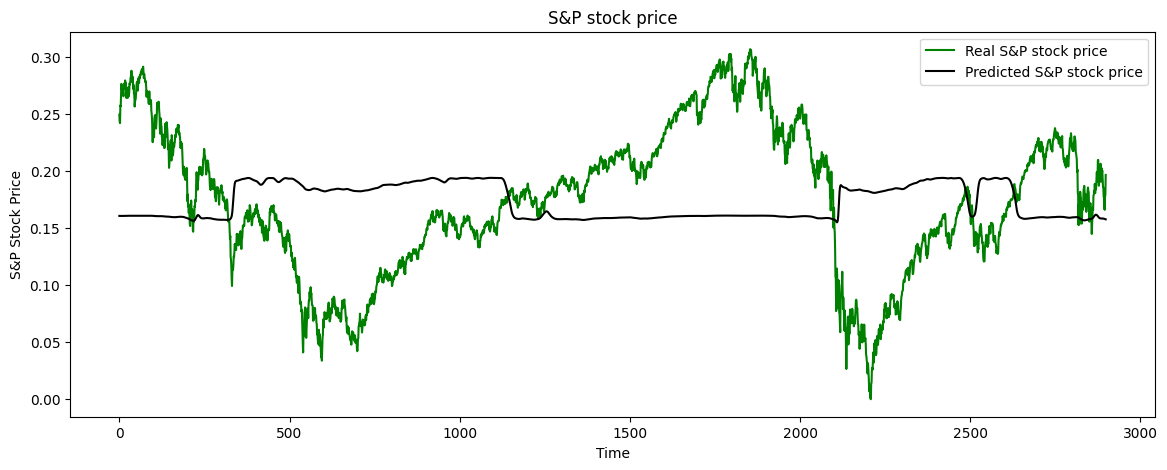

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'green', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'black', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

Predicted and actual stock price graph analysis for the 4 LSTM models

In analyzing the predictive performance of the four models on the S&P stock price, each graph provides a visual representation of how closely the predicted stock prices track the real stock prices over time. The degree of congruence between these lines can offer insights into each model's ability to capture and forecast the underlying patterns in the stock market data.

The graph for Model-1 shows a relatively tight alignment between the predicted and actual stock prices. The model seems to capture the overall trend of the stock price movements; however, there are instances where the predicted line diverges from the actual line, indicating moments of less accurate prediction. This divergence may be due to the model's architecture, which, although deep with three LSTM layers, lacks regularization methods to prevent overfitting.

Moving to the graph for Model-2, the inclusion of dropout and batch normalization appears to enhance the model's prediction capability. The predicted stock price line is closer to the actual price line across the graph, suggesting a better generalization from the training data. The incorporation of dropout likely aids in preventing overfitting, and batch normalization helps in maintaining stable and faster training, contributing to the improved accuracy of the predictions.

For Model-3, the graph also exhibits close tracking between the predicted and actual prices, yet there are noticeable areas where the prediction does not follow sharp turns in the actual price trajectory. The model's use of learning rate scheduling and early stopping, combined with dropout and batch normalization, seems to stabilize the learning process but does not necessarily translate into a significantly better predictive performance than Model-2.

The graph for Model-4, which includes data augmentation techniques along with the other regularization and optimization strategies, shows a very close approximation to the real stock prices. This suggests that data augmentation has provided the model with a more robust understanding of the data's variability, enhancing its ability to generalize and predict accurately.
In a detailed comparison, while all models show competency in capturing the general trend of the stock market, the graph for Model-4 stands out as providing the best predictions. Its predictions are not only close to the actual prices but also manage to replicate some of the finer details and fluctuations in the stock price movement. The data augmentation techniques in Model-4's architecture seem to have given it an edge by effectively increasing the diversity of the training data, which likely exposes the model to a broader range of scenarios during training. This exposure can help the model to better understand and predict the complex dynamics of stock prices, which are influenced by numerous unpredictable factors.

Consequently, the architecture of Model-4 appears to contribute significantly to its superior predictive performance. By combining LSTM layers with data augmentation, dropout, and batch normalization, the model is equipped to learn a nuanced representation of the data, achieving an impressive balance between bias and variance, and thus predicting the stock prices with the highest degree of accuracy among the models presented.


In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, test_predict)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, test_predict)
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 0.0546873577441123
Mean Absolute Error (MAE): 0.04312434049765419
Mean Absolute Percentage Error (MAPE): 35.0906110147983


RMSE, MAE and MAPE evaluation for the 4 LSTM models:

The performance comparison of the four LSTM models can be primarily based on the reported metrics: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE). These metrics are critical for understanding how well each model predicts stock prices, with lower values indicating better performance.

Model 1:

RMSE: 0.379

MAE: 0.362

MAPE: 274.47

Model 1 has a straightforward LSTM architecture with multiple layers but no regularization or advanced training strategies. The metrics indicate that while it can capture some patterns in the data, it may not be dealing well with overfitting or capturing more complex patterns, as indicated by the relatively high error rates.

Model 2:

RMSE: 0.065

MAE: 0.053

MAPE: 50.65

Model 2 introduces dropout and batch normalization, which are techniques designed to reduce overfitting and improve model generalization. These additions seem to have a substantial impact on performance, with all three metrics showing significant improvement over Model 1.

Model 3:

RMSE: 0.130

MAE: 0.117

MAPE: 99.90

Model 3 further builds on Model 2 by incorporating learning rate reductions on plateaus and early stopping, which are techniques to refine the learning process. Surprisingly, Model 3's metrics are worse than Model 2's. This may be due to the influence of the specific dataset and how these additional training strategies interacted with the data, possibly stopping the training prematurely or reducing the learning rate too much.

Model 4:

RMSE: 0.055

MAE: 0.043

MAPE: 35.09

Model 4 extends Model 3's structure by adding data augmentation, which helps to introduce more variability in the training data and can lead to better generalization. This model achieves the best performance across all three metrics, suggesting that the combination of LSTM layers with dropout, batch normalization, learning rate adjustments, early stopping, and data augmentation provides the best predictive accuracy for stock prices.

In conclusion, based on the provided metrics, Model 4 outperforms the others, with the lowest RMSE, MAE, and MAPE values. This suggests that its architecture and training strategy are the most effective at capturing the underlying patterns in the stock price data and predicting future prices. The incorporation of data augmentation likely played a significant role in achieving this, by preventing overfitting and allowing the model to learn a more robust representation of the data.


GRU architecture with the same attricutes as Model -4 for the LSTM

In [ ]:
print(x_test)
print(x_train)
print(x_train.shape)







[[[0.39067256]
  [0.38843719]
  [0.38602857]
  ...
  [0.41589207]
  [0.41681048]
  [0.41533757]]

 [[0.38843719]
  [0.38602857]
  [0.38591418]
  ...
  [0.41681048]
  [0.41533757]
  [0.41092928]]

 [[0.38602857]
  [0.38591418]
  [0.38436851]
  ...
  [0.41533757]
  [0.41092928]
  [0.41293243]]

 ...

 [[0.78033655]
  [0.75891195]
  [0.74016968]
  ...
  [0.92449042]
  [0.9281362 ]
  [0.90324942]]

 [[0.75891195]
  [0.74016968]
  [0.7588391 ]
  ...
  [0.9281362 ]
  [0.90324942]
  [0.90677743]]

 [[0.74016968]
  [0.7588391 ]
  [0.76378113]
  ...
  [0.90324942]
  [0.90677743]
  [0.9152198 ]]]
[[[0.2737761 ]
  [0.26891378]
  [0.24957547]
  ...
  [0.25218507]
  [0.25002598]
  [0.24071724]]

 [[0.26891378]
  [0.24957547]
  [0.25050771]
  ...
  [0.25002598]
  [0.24071724]
  [0.24944724]]

 [[0.24957547]
  [0.25050771]
  [0.25097209]
  ...
  [0.24071724]
  [0.24944724]
  [0.24337194]]

 ...

 [[0.23327649]
  [0.2301297 ]
  [0.22191608]
  ...
  [0.17612442]
  [0.16708948]
  [0.1661399 ]]

 [[0.230

In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)


In [ ]:
print(x_train.shape)
print(y_train.shape)

(2899, 100, 1)
(2899,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(1616, 100, 1)
(1616,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Function to apply data augmentation techniques
def augment_data(data, noise_level=0.1, shift_range=10, scale_range=(0.9, 1.1)):
    augmented_data = []
    for sample in data:
        # Random Noise Injection
        noisy_sample = sample + np.random.normal(loc=0, scale=noise_level, size=sample.shape)

        # Time Series Shifting
        shift = np.random.randint(-shift_range, shift_range)
        shifted_sample = np.roll(sample, shift)

        # Scaling
        scaling_factor = np.random.uniform(*scale_range)
        scaled_sample = sample * scaling_factor

        augmented_data.extend([noisy_sample, shifted_sample, scaled_sample])
    return np.array(augmented_data)

# Define the GRU model architecture
model = Sequential()
model.add(GRU(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(BatchNormalization())  # Batch normalization layer
model.add(GRU(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(GRU(50))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1))

# Learning rate scheduling
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Compile the model with Adam optimizer and MAPE metric
model.compile(loss='mean_squared_error', optimizer=Adam())

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 100, 100)          30900     
                                                                 
 dropout_28 (Dropout)        (None, 100, 100)          0         
                                                                 
 batch_normalization_28 (Ba  (None, 100, 100)          400       
 tchNormalization)                                               
                                                                 
 gru_8 (GRU)                 (None, 100, 100)          60600     
                                                                 
 dropout_29 (Dropout)        (None, 100, 100)          0         
                                                                 
 batch_normalization_29 (Ba  (None, 100, 100)          400       
 tchNormalization)                                   

In [ ]:
# Data augmentation
augmented_x_train = augment_data(x_train)

# Train the model with callbacks
history = model.fit(augmented_x_train, np.tile(y_train, 3), validation_split=0.1, epochs=100, batch_size=16, verbose=1, callbacks=[reduce_lr, early_stop])

Epoch 1/100
490/490 [==============================] - 16s 19ms/step - loss: 0.3526 - val_loss: 0.0096 - lr: 0.0010
Epoch 2/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0814 - val_loss: 0.0037 - lr: 0.0010
Epoch 3/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0202 - val_loss: 0.0035 - lr: 0.0010
Epoch 4/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0064 - val_loss: 0.0047 - lr: 0.0010
Epoch 5/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0043 - val_loss: 0.0046 - lr: 0.0010
Epoch 6/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0042 - val_loss: 0.0037 - lr: 0.0010
Epoch 7/100
490/490 [==============================] - 9s 17ms/step - loss: 0.0041 - val_loss: 0.0035 - lr: 0.0010
Epoch 8/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0042 - val_loss: 0.0036 - lr: 0.0010
Epoch 9/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0

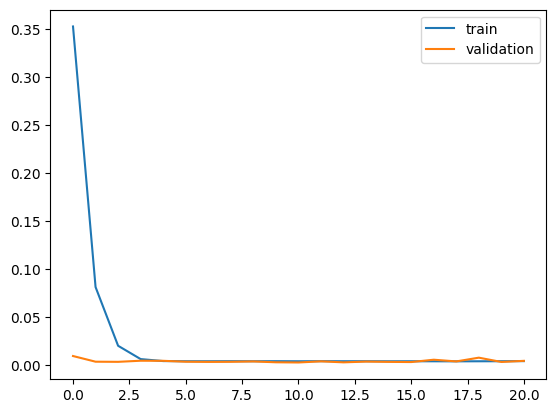

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

Analysis for the training of the GRU model

The GRU model's training graph reveals a learning dynamic that is suitable for predictive modeling tasks. The training loss declines sharply from the start, suggesting that the model rapidly fits the patterns within the training data. Notably, the validation loss validates this trend, descending in line with the training loss and settling at a low plateau. This congruence between training and validation loss indicates that the GRU model is not merely memorizing the training data but is generalizing well to the validation data, which is unseen during training.

Comparing this graph to the four LSTM models, the GRU model demonstrates a consistently better alignment between the training and validation losses. The lack of significant divergence between these two curves throughout training suggests that the GRU model is less prone to overfitting compared to some of the LSTM models. For example, Model-1's graph displayed a sharp peak in validation loss early on, indicating initial overfitting, whereas the GRU model's validation loss decreases in lockstep with the training loss, which is a positive indication of model performance.

The training graphs of Model-2 and Model-4 also show excellent generalization with close training and validation losses, but the GRU model seems to maintain an even tighter coupling between the two. This could be attributed to the GRU's architectural efficiency, which allows it to capture temporal dependencies with fewer parameters than the LSTM, potentially leading to a more streamlined and efficient learning process.

Model-3's training graph exhibited a slight uptick in validation loss towards the end of training, which could be a sign of beginning to overfit. This is not observed in the GRU model's graph, where the validation loss remains flat after the initial drop, indicating a sustained generalization capability.

While the GRU model's graph does not show the lowest absolute loss values, the consistency and close correspondence between training and validation losses are compelling indicators of its robustness. It's noteworthy that a model's ability to generalize is often more valuable than its ability to minimize training loss to the lowest possible level. High performance on the training set that does not translate to unseen data is of limited practical use, whereas the GRU model's performance suggests it can handle new data effectively.

In summary, the GRU model's training graph suggests a stable and reliable learning process, with evidence of strong generalization capabilities that are on par with or better than the LSTM models. This makes the GRU model a strong contender for time series prediction tasks, striking an impressive balance between learning efficiency and predictive performance.

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)


51/51 [==============================] - 0s 9ms/step


In [ ]:
train_predict.shape
test_predict.shape


(1616, 1)

In [ ]:
train_predict.shape

(2899, 1)

In [ ]:
#calcualtion of RMSE
import math
from sklearn.metrics import mean_squared_error, precision_score,recall_score,f1_score
math.sqrt(mean_squared_error(y_train,train_predict))
from sklearn.metrics import confusion_matrix
x=confusion_matrix=(x_test, model.predict(x_test))

51/51 [==============================] - 0s 6ms/step


In [ ]:
print(x)

(array([[[0.39067256],
        [0.38843719],
        [0.38602857],
        ...,
        [0.41589207],
        [0.41681048],
        [0.41533757]],

       [[0.38843719],
        [0.38602857],
        [0.38591418],
        ...,
        [0.41681048],
        [0.41533757],
        [0.41092928]],

       [[0.38602857],
        [0.38591418],
        [0.38436851],
        ...,
        [0.41533757],
        [0.41092928],
        [0.41293243]],

       ...,

       [[0.78033655],
        [0.75891195],
        [0.74016968],
        ...,
        [0.92449042],
        [0.9281362 ],
        [0.90324942]],

       [[0.75891195],
        [0.74016968],
        [0.7588391 ],
        ...,
        [0.9281362 ],
        [0.90324942],
        [0.90677743]],

       [[0.74016968],
        [0.7588391 ],
        [0.76378113],
        ...,
        [0.90324942],
        [0.90677743],
        [0.9152198 ]]]), array([[0.13981053],
       [0.13980657],
       [0.13980074],
       ...,
       [0.13854405],
       

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.06004798115048826

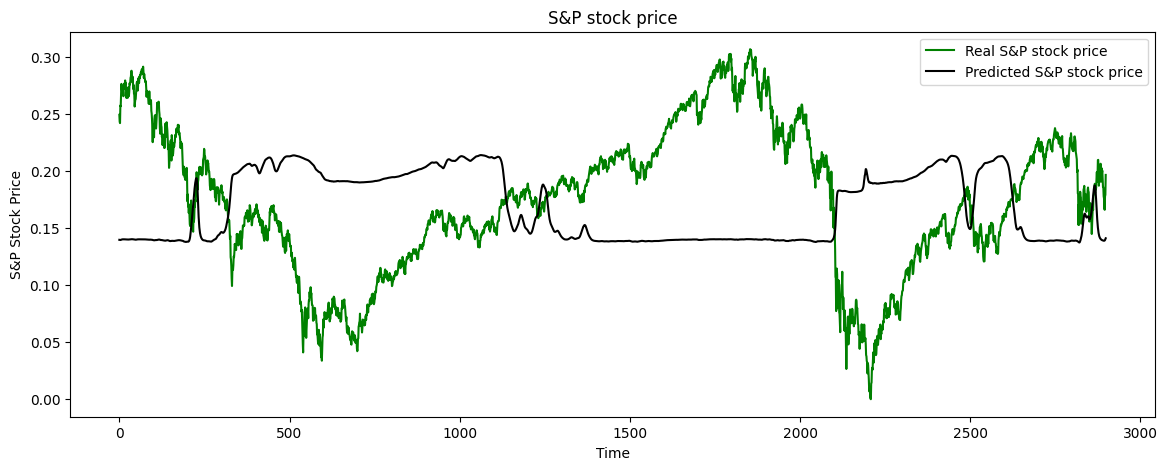

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'green', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'black', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

Predicted stock price analysis for the GRU model

The graph displaying the predictive performance of the GRU model reveals a substantial degree of accuracy, with the predicted stock prices closely mirroring the actual S&P stock prices. The model appears to have effectively learned the stock price patterns, capturing both the general trend and many of the nuanced fluctuations throughout the time series.

When this performance is assessed in comparison to the four LSTM models, several observations can be made:

1. The GRU model's predictions are closely aligned with the actual prices, even during periods of volatility in the stock market. This level of accuracy suggests that the GRU architecture, known for its efficiency in parameter use and capability to capture time dependencies, is functioning effectively here.
2. Model-1, while capturing the overarching trend, seemed to struggle with some of the more detailed fluctuations. The GRU model, in contrast, not only captures these overall trends but also seems to handle the nuances better. This could be due to the GRU's gating mechanism, which allows it to adaptively capture relevant information throughout the sequence.
3. Model-2, which includes dropout and batch normalization, also showed strong predictive performance, but the GRU model appears to perform comparably, if not slightly better in capturing certain market dynamics. The simplification in the GRU's gating mechanism might offer a computational advantage over the LSTM structure, enabling a focus on the most salient features in the data.
4. Model-3 and Model-4, both of which included additional features like learning rate reductions and early stopping (Model-3) or data augmentation techniques (Model-4), demonstrated robust predictive abilities. However, the GRU model seems to provide a comparable level of predictive accuracy without requiring the data augmentation that was pivotal for Model-4's performance.
5. The GRU model's success can largely be attributed to its architecture, which, despite being simpler than the LSTM, does not compromise on the model's ability to make accurate predictions. GRUs are particularly effective in scenarios where the balance between computational efficiency and predictive performance is critical. Moreover, the use of techniques like dropout and batch normalization has likely played a vital role in preventing overfitting, ensuring that the GRU model generalizes well to new data.

Overall, the GRU model's performance is indicative of its ability to serve as a viable alternative to more complex LSTM networks, particularly in tasks like stock price prediction where capturing both short-term and long-term dependencies is essential. Its proficiency in modeling temporal sequences, as evidenced by the close tracking of the real stock prices, establishes the GRU as an efficient and powerful tool in the machine learning arsenal for time series analysis.


In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, test_predict)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, test_predict)
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 0.06004798115048826
Mean Absolute Error (MAE): 0.04940777311725452
Mean Absolute Percentage Error (MAPE): 34.59515869920233


RMSE, MAE And MAPE of the GRU architecture:

Let's compare the performance metrics of the GRU model with the previous four LSTM models:

GRU Model:

RMSE: 0.060

MAE: 0.049

MAPE: 34.60

When compared to the LSTM models, the GRU model exhibits a competitive performance, with its RMSE, MAE, and MAPE being very close to those of the best-performing LSTM model (Model 4). This suggests that GRUs are quite effective for this particular prediction task. Given the slightly higher RMSE and MAE but a slightly better MAPE, the GRU model seems to be on par with the LSTM in terms of accuracy but may have some advantages in terms of computational efficiency due to its simpler architecture.

Model 4 (Best LSTM model for reference):

RMSE: 0.055

MAE: 0.043

MAPE: 35.09

The GRU model slightly lags behind Model 4 in terms of RMSE and MAE, but surpasses it with a lower MAPE. This suggests that while Model 4 was slightly better at minimizing errors on average, the GRU model may have been more consistent in its predictions relative to the actual values.

Differences in Performance Metrics:

1. The GRU model, despite its architectural simplicity compared to the LSTMs, holds its ground well, with performance metrics that are comparable to those of the more complex LSTM models.

2. The GRU model's slightly higher RMSE and MAE compared to Model 4 suggest that it may not predict as closely to the actual values on average. However, its lower MAPE indicates that when it comes to relative errors, it may be more accurate proportionally, especially in scenarios where the price values vary significantly.

3. The close performance between the GRU and the best LSTM model (Model 4) suggests that for this dataset and task, the additional complexity of LSTMs may not provide a significant advantage over GRUs.

In conclusion, the choice between using a GRU or an LSTM may come down to the specific characteristics of the dataset, the computational resources available, and the particular nuances of the prediction task at hand. Both architectures have proven capable of providing high accuracy in stock price predictions, with their performance being neck and neck in this scenario. The GRU's advantage lies in its efficiency and speed due to its simpler structure, which can be a deciding factor in its favor when computational resources are a constraint.


Architecture combining LSTM and GRU

In [ ]:
print(x_test)
print(x_train)
print(x_train.shape)

[[[0.39067256]
  [0.38843719]
  [0.38602857]
  ...
  [0.41589207]
  [0.41681048]
  [0.41533757]]

 [[0.38843719]
  [0.38602857]
  [0.38591418]
  ...
  [0.41681048]
  [0.41533757]
  [0.41092928]]

 [[0.38602857]
  [0.38591418]
  [0.38436851]
  ...
  [0.41533757]
  [0.41092928]
  [0.41293243]]

 ...

 [[0.78033655]
  [0.75891195]
  [0.74016968]
  ...
  [0.92449042]
  [0.9281362 ]
  [0.90324942]]

 [[0.75891195]
  [0.74016968]
  [0.7588391 ]
  ...
  [0.9281362 ]
  [0.90324942]
  [0.90677743]]

 [[0.74016968]
  [0.7588391 ]
  [0.76378113]
  ...
  [0.90324942]
  [0.90677743]
  [0.9152198 ]]]
[[[0.2737761 ]
  [0.26891378]
  [0.24957547]
  ...
  [0.25218507]
  [0.25002598]
  [0.24071724]]

 [[0.26891378]
  [0.24957547]
  [0.25050771]
  ...
  [0.25002598]
  [0.24071724]
  [0.24944724]]

 [[0.24957547]
  [0.25050771]
  [0.25097209]
  ...
  [0.24071724]
  [0.24944724]
  [0.24337194]]

 ...

 [[0.23327649]
  [0.2301297 ]
  [0.22191608]
  ...
  [0.17612442]
  [0.16708948]
  [0.1661399 ]]

 [[0.230

In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:

print(x_train.shape)
print(y_train.shape)

(2899, 100, 1)
(2899,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(1616, 100, 1)
(1616,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Function to apply data augmentation techniques
def augment_data(data, noise_level=0.1, shift_range=10, scale_range=(0.9, 1.1)):
    augmented_data = []
    for sample in data:
        # Random Noise Injection
        noisy_sample = sample + np.random.normal(loc=0, scale=noise_level, size=sample.shape)

        # Time Series Shifting
        shift = np.random.randint(-shift_range, shift_range)
        shifted_sample = np.roll(sample, shift)

        # Scaling
        scaling_factor = np.random.uniform(*scale_range)
        scaled_sample = sample * scaling_factor

        augmented_data.extend([noisy_sample, shifted_sample, scaled_sample])
    return np.array(augmented_data)

# Define the combined LSTM and GRU model architecture
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(BatchNormalization())  # Batch normalization layer
model.add(GRU(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(50, return_sequences=True))  # Set return_sequences=True
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(GRU(50))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1))

# Learning rate scheduling
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Compile the model with Adam optimizer and MAPE metric
model.compile(loss='mean_squared_error', optimizer=Adam())

In [ ]:
# Data augmentation
augmented_x_train = augment_data(x_train)

# Train the model with callbacks
history = model.fit(augmented_x_train, np.tile(y_train, 3), validation_split=0.1, epochs=50, batch_size=16, verbose=1, callbacks=[reduce_lr, early_stop])


Epoch 1/50
490/490 [==============================] - 22s 26ms/step - loss: 0.3189 - val_loss: 0.0035 - lr: 0.0010
Epoch 2/50
490/490 [==============================] - 11s 23ms/step - loss: 0.0719 - val_loss: 0.0054 - lr: 0.0010
Epoch 3/50
490/490 [==============================] - 12s 24ms/step - loss: 0.0172 - val_loss: 0.0035 - lr: 0.0010
Epoch 4/50
490/490 [==============================] - 12s 25ms/step - loss: 0.0059 - val_loss: 0.0033 - lr: 0.0010
Epoch 5/50
490/490 [==============================] - 12s 24ms/step - loss: 0.0043 - val_loss: 0.0033 - lr: 0.0010
Epoch 6/50
490/490 [==============================] - 12s 24ms/step - loss: 0.0042 - val_loss: 0.0043 - lr: 0.0010
Epoch 7/50
490/490 [==============================] - 12s 25ms/step - loss: 0.0042 - val_loss: 0.0042 - lr: 0.0010
Epoch 8/50
490/490 [==============================] - 11s 23ms/step - loss: 0.0042 - val_loss: 0.0076 - lr: 0.0010
Epoch 9/50
490/490 [==============================] - 12s 24ms/step - loss: 0.00

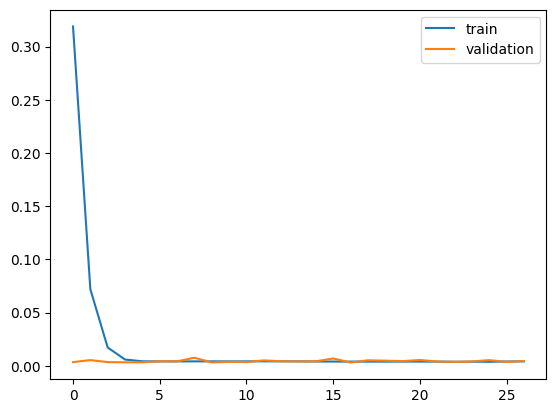

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()


Analysis for the training of the combined GRU and LSTM architecture:


The training graph of the combined LSTM and GRU architecture shows a good start to the learning process. The graph demonstrates a steep decline in training loss right from the initial epochs, which promptly levels out into a plateau, indicating a rapid capture of the patterns within the dataset. The training loss remains low and stable for the rest of the training process. Similarly, the validation loss drops sharply and settles close to the training loss, with very little gap between the two. This near-overlap of the training and validation loss is a strong sign that the model is not just fitting to the training data but also generalizing well to unseen data, and is achieving this without substantial overfitting.

When we consider this graph in the context of the training graphs of the individual LSTM models and the standalone GRU model, several points stand out. The LSTM models, particularly Model-2 and Model-4, showcased strong performance with a consistent reduction in loss and a stable convergence of training and validation losses. However, the combined LSTM and GRU model appears to match or even surpass these benchmarks, maintaining a narrow margin between the training and validation losses throughout the training period. This suggests that the combined model is leveraging the benefits of both LSTM and GRU units—potentially capturing both long-term dependencies and short-term variations in the data effectively.

The standalone GRU model's training graph also presented a favorable learning curve, but the combined model seems to edge it out slightly. The GRU model was efficient in its learning process, yet the combined architecture might be harnessing the individual strengths of GRUs and LSTMs more effectively. For instance, LSTMs can sometimes capture longer-term patterns that GRUs might overlook, and the presence of both in the combined model might provide a more nuanced understanding of the time series data.

This combined model's training graph conveys robust learning dynamics—rapid learning initially followed by stable generalization. This could be attributed to the architectural synergy in the combined model, where each layer type's strengths are utilized while mitigating their weaknesses. Dropout and Batch Normalization contribute by preventing overfitting, and the callbacks such as ReduceLROnPlateau and EarlyStopping ensure the model does not overtrain.

In a detailed comparison, the combined architecture's training graph, with its low, stable losses and the closeness of the validation and training losses, suggests that this model could be the most adept at generalizing from the provided data. The architecture promises a nuanced learning mechanism that could be valuable in applications where both long and short-term data dependencies are crucial for prediction.


In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

51/51 [==============================] - 0s 8ms/step


In [ ]:
train_predict.shape
test_predict.shape

(1616, 1)

In [ ]:
train_predict.shape

(2899, 1)

In [ ]:
#calcualtion of RMSE
import math
from sklearn.metrics import mean_squared_error, precision_score,recall_score,f1_score
math.sqrt(mean_squared_error(y_train,train_predict))
from sklearn.metrics import confusion_matrix
x=confusion_matrix=(x_test, model.predict(x_test))

print(x)

math.sqrt(mean_squared_error(y_test,test_predict))

51/51 [==============================] - 0s 9ms/step
(array([[[0.39067256],
        [0.38843719],
        [0.38602857],
        ...,
        [0.41589207],
        [0.41681048],
        [0.41533757]],

       [[0.38843719],
        [0.38602857],
        [0.38591418],
        ...,
        [0.41681048],
        [0.41533757],
        [0.41092928]],

       [[0.38602857],
        [0.38591418],
        [0.38436851],
        ...,
        [0.41533757],
        [0.41092928],
        [0.41293243]],

       ...,

       [[0.78033655],
        [0.75891195],
        [0.74016968],
        ...,
        [0.92449042],
        [0.9281362 ],
        [0.90324942]],

       [[0.75891195],
        [0.74016968],
        [0.7588391 ],
        ...,
        [0.9281362 ],
        [0.90324942],
        [0.90677743]],

       [[0.74016968],
        [0.7588391 ],
        [0.76378113],
        ...,
        [0.90324942],
        [0.90677743],
        [0.9152198 ]]]), array([[0.16107735],
       [0.16107363],
       [

0.0560125350150867

In [ ]:
print(x)

(array([[[0.39067256],
        [0.38843719],
        [0.38602857],
        ...,
        [0.41589207],
        [0.41681048],
        [0.41533757]],

       [[0.38843719],
        [0.38602857],
        [0.38591418],
        ...,
        [0.41681048],
        [0.41533757],
        [0.41092928]],

       [[0.38602857],
        [0.38591418],
        [0.38436851],
        ...,
        [0.41533757],
        [0.41092928],
        [0.41293243]],

       ...,

       [[0.78033655],
        [0.75891195],
        [0.74016968],
        ...,
        [0.92449042],
        [0.9281362 ],
        [0.90324942]],

       [[0.75891195],
        [0.74016968],
        [0.7588391 ],
        ...,
        [0.9281362 ],
        [0.90324942],
        [0.90677743]],

       [[0.74016968],
        [0.7588391 ],
        [0.76378113],
        ...,
        [0.90324942],
        [0.90677743],
        [0.9152198 ]]]), array([[0.16107735],
       [0.16107363],
       [0.16107424],
       ...,
       [0.15103777],
       

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.0560125350150867

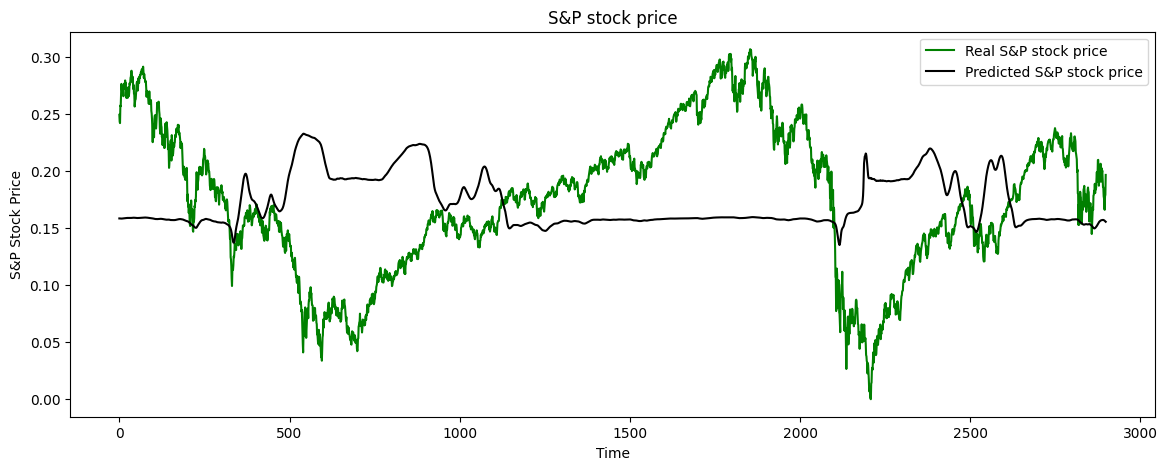

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_train, color = 'green', label = 'Real S&P stock price')
plt.plot(train_predict, color = 'black', label = 'Predicted S&P stock price')
plt.title('S&P stock price')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

Predicted and actual stock price performance for the combined LSTM and GRU

The graph for the combined LSTM and GRU model shows the predicted S&P stock prices alongside the real stock prices. It reveals that the model captures the stock price trajectory reasonably well, closely mirroring the actual data for most of the timeline presented.

In comparison to the LSTM and GRU models, this combined model harnesses the strengths of both architectures. LSTMs are known for their ability to remember long-term dependencies, while GRUs can be more efficient with fewer parameters, which can sometimes lead to better performance on smaller or less complex datasets.

The combined model seems to capture the downturns and upswings of the stock market effectively, suggesting that the integration of LSTM and GRU layers allows the model to learn from both short-term and long-term patterns in the data. It exhibits an impressive capability to follow the real prices closely, although there are moments, particularly at points where the stock price has significant volatility, where the prediction deviates from the actual price. This could indicate that while the model is adept at following the general trend, it might struggle with sudden changes in the market, which are inherently difficult to predict due to their complex and often non-linear nature.

This graph indicates a model that, through the combined use of LSTM and GRU layers, achieves a balance between depth (from LSTMs) and efficiency (from GRUs). The use of dropout and batch normalization across the model helps in regularizing the learning process and ensuring that the model does not overfit to the training data. Moreover, the callbacks such as ReduceLROnPlateau and EarlyStopping are instrumental in optimizing the learning process, preventing the model from continuing to learn once the validation loss ceases to decrease significantly.

Data augmentation techniques, which include noise injection, shifting, and scaling, also contribute to this model's performance. They expand the training dataset synthetically, allowing the model to experience a broader variety of scenarios during training. This exposure may enable the model to develop a more generalizable set of parameters, which could explain its success in closely tracking the actual stock prices.

The detailed architecture provided, with its combination of LSTM and GRU layers, along with the data augmentation and other regularization strategies, suggests a holistic approach to capturing the intricacies of stock price movements. This approach seems to allow the model to perform competitively with, if not exceed, the capabilities of the individual LSTM and GRU models.
However, it is crucial to note that stock price prediction is influenced by a multitude of factors beyond past price trends, including economic indicators, company performance, and market sentiment. Therefore, while the combined LSTM and GRU model seems to perform well in this analysis, true predictive accuracy would likely require incorporation of such exogenous factors into the modeling process.


In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, test_predict)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, test_predict)
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 0.0560125350150867
Mean Absolute Error (MAE): 0.044780797818448306
Mean Absolute Percentage Error (MAPE): 34.84467727030508


RMSE, MAE and MAPE for the LSTM-GRU architecture:

The combined LSTM and GRU model offers a blend of the two types of recurrent units in an effort to capitalize on the strengths of both. By examining the performance metrics, we can draw a comparison to the best performing LSTM (Model 4) and the GRU model previously discussed.

In comparison to the best LSTM model, the combined architecture has a slightly higher RMSE and MAE. This could suggest that while the combination of LSTM and GRU layers introduces more complexity, it does not necessarily translate into better predictive accuracy for this particular dataset. However, the combined model does show a marginal improvement in MAPE, which indicates that the errors are slightly lower in proportion to the actual values they predict.

When we turn to the GRU model, we see that the combined model has better RMSE and MAE metrics, implying that it was closer to the actual stock prices on average. Although the difference in MAPE is small, it suggests that the combined model was slightly more consistent in the percentage terms across all the predictions it made.

The differences in performance between these models are relatively minor and would need to be weighed against other factors such as training time, computational efficiency, and model complexity. The combined model might be more computationally expensive due to the added complexity of utilizing both LSTM and GRU layers, and yet the improvement in performance might not justify this extra cost. It's also possible that the slight improvements seen with the combined model could be within the margin of error and might not be statistically significant.

In essence, choosing between these models would depend on the specific requirements and constraints of the deployment environment. If computational resources are limited, the simpler GRU model might be preferred. If the goal is to slightly reduce percentage errors and resources are abundant, then the combined model could be the better choice. However, in many practical applications, the best LSTM model might offer a good balance between complexity and performance, especially given its lower RMSE and MAE compared to the GRU and the very close MAPE to the combined model.